# 2 - Hackath - EDA - R

In [2]:
library(DBI)
library(odbc)
#if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
if(!require(ggplot2)) {install.packages("ggplot2");require(ggplot2)}
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Loading required package: tibble

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools


Attaching package: 'gtools'


The following object is masked from 'package:car':

    logit


Loading required package: chron

Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.2"
Loading required package: mvoutl

In [3]:
df <- read.csv("c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/train.csv")
head(df)

Label device_id timestamp  packet_length Header_revision Header_pad
1 10    1         1449824329 112           0               0         
2 10    1         1449826933 112           0               0         
3 10    1         1449827611 112           0               0         
4 10    1         1449828140 112           0               0         
5 10    1         1449829176 112           0               0         
6 10    1         1449831703 112           0               0         
  Header_length TSFT Flags Rate ... Source_address    BSS_Id           
1 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
2 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
3 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
4 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
5 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
6 38            0    0     0    ... c0:ee:fb:00:59:00 00:00:00:00:00:00
  Fragment_number Sequence_number Tagged_parameters_bytes SSID Supported_Rates
1 0               0               46                           54             
2 0               0               46                           54             
3 0               0               46                           54             
4 0               0               46                           54             
5 0               0               46                           54             
6 0               0               46                           54             
  Current_Channel MAC_timestamp TSF_timestamp
1 NA              824291256     824291256    
2 NA              824291256     824291256    
3 NA              824291256     824291256    
4 NA              824291256     824291256    
5 NA              824291256     824291256    
6 NA              824291256     824291256

In [4]:
summary(df)

     Label          device_id       timestamp         packet_length
 Min.   : 1.000   Min.   :    1   Min.   :1.360e+09   Min.   : 51  
 1st Qu.: 1.000   1st Qu.:  663   1st Qu.:1.366e+09   1st Qu.: 88  
 Median : 2.000   Median : 3712   Median :1.367e+09   Median :139  
 Mean   : 4.606   Mean   : 4747   Mean   :1.368e+09   Mean   :124  
 3rd Qu.:11.000   3rd Qu.: 7842   3rd Qu.:1.367e+09   3rd Qu.:150  
 Max.   :12.000   Max.   :14029   Max.   :1.450e+09   Max.   :296  
                                                                   
 Header_revision   Header_pad Header_length        TSFT            Flags       
 Min.   :0       Min.   :0    Min.   :18.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0       1st Qu.:0    1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0       Median :0    Median :25.00   Median :1.0000   Median :0.0000  
 Mean   :0       Mean   :0    Mean   :22.93   Mean   :0.5624   Mean   :0.4083  
 3rd Qu.:0       3rd Qu.:0    3rd Qu.:26.00   3rd Qu.:1.

## Removing variables with less than 2 levels

In [5]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}
df <- df[ , !names(df) %in% l1]
head(df)

Label device_id timestamp  packet_length Header_length TSFT Flags Rate
1 10    1         1449824329 112           38            0    0     0   
2 10    1         1449826933 112           38            0    0     0   
3 10    1         1449827611 112           38            0    0     0   
4 10    1         1449828140 112           38            0    0     0   
5 10    1         1449829176 112           38            0    0     0   
6 10    1         1449831703 112           38            0    0     0   
  Channel dBm_Antenna_Noise ... PWR_MGT Destination_address Source_address   
1 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
2 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
3 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
4 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
5 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
6 0       0                 ... 0       00:00:00:00:00:00   c0:ee:fb:00:59:00
  BSS_Id            Sequence_number Tagged_parameters_bytes SSID
1 00:00:00:00:00:00 0               46                          
2 00:00:00:00:00:00 0               46                          
3 00:00:00:00:00:00 0               46                          
4 00:00:00:00:00:00 0               46                          
5 00:00:00:00:00:00 0               46                          
6 00:00:00:00:00:00 0               46                          
  Supported_Rates MAC_timestamp TSF_timestamp
1 54              824291256     824291256    
2 54              824291256     824291256    
3 54              824291256     824291256    
4 54              824291256     824291256    
5 54              824291256     824291256    
6 54              824291256     824291256

# Exploratory data analysis

In [9]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report

  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>
      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });
      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });
      $('#myform2').submit(function(e) {
      e.preventDefault();
      });
      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });
      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });
      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });
      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });
      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });
      </script>
      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>
      </head>
      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############



############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                    debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")

        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)

        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings..."
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values...get them out...
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
  x <- setdiff(x, vv)
  if(is.null(rn)==FALSE & length(jj)>0) {
    rn <- rn[-jj]
  }

  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as_tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- dplyr::filter(tabaaa1,Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))
        tabaaa1 <- dplyr::filter(tabaaa1,Pop != " -- ") #%>%
      }
    }
  }

  tabaaa1 <- dplyr::select(tabaaa1,-n)
  tabaaa1 <- dplyr::select(tabaaa1,-Del)

  ##### Join the tables...
  #Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    #wb <- xlsx::createWorkbook()
    #sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    #xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    #xlsx::saveWorkbook(wb, excel_file)
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
     rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      suppressWarnings(suppressMessages(nr <- dplyr::left_join(nr,col3)))
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{

  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }

  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }

  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################
modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  #utils::globalVariables(c("weight","n","weighted_pct","outcome1","wght","adj","res","pop"))
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  ###### generate tables
  age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                 "35-39","40-44","45-49","50-54","55-59","60-64",
                 "65-69","70-74","75-79","80-84","85-89","90-94",
                 "95-99","100+")

  age_min <- seq(0,100,5)
  age_max <- c(seq(4,99,5),130)
  who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
           4550,3720,2960,2210,1520,910,440,150,40,5)
  euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
           7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
  us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
          19962099,20179642,20890964,22708591,22298125,19664805,
          16817924,12435263,9278166,7317795,5743327,3620459,
          1448366,371244,53364)
  age.adjust <- tibble::tibble(age_group, age_min, age_max, who, euro, us)
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    weighting <- age.adjust %>%
      dplyr::select_(~age_group, ~age_min, ~age_max, source)
    weighting <- weighting %>% dplyr::filter_(~age_min >= agemin, ~age_max <= agemax)
    ages <- tibble::tibble(age=seq(0,120,1))
    ages <- ages %>% dplyr::mutate(age_min = ifelse((age/10)-floor(age/10) < 0.5, floor(age/10)*10, (floor(age/10)*10)+5),
                            age_max = ifelse((age/10)-floor(age/10) < 0.5, (floor(age/10)*10)+4, (floor(age/10)*10)+9))
    ages <- ages %>% dplyr::mutate(age_min=replace(age_min, age_min > 100,100),
                            age_max=replace(age_max, age_max > 100, 130))
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting <- weighting %>%
      dplyr::mutate_(weight=source) %>%
      dplyr::mutate(weight=(weight/tot))
    weighting <- suppressMessages(dplyr::inner_join(weighting, ages))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    d1 <- suppressMessages(dplyr::inner_join(dataset, weighting))
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1 %>%
      dplyr::select(age_group, weight, outcome)#, tot)
    d2 <- d1 %>%
      dplyr::group_by(age_group) %>%
      dplyr::select(age_group, weight, outcome) %>%
      dplyr::summarise(outcm1=sum(outcome),
                wght=max(weight),
                pop=n()) %>%
      dplyr::select(outcm1,wght,pop)
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- d2 %>%
      dplyr::summarise(res=sum(adj)) %>%
      dplyr::select(res) %>%
      as.numeric()
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
             )
  #g1 <- data.frame(Outcome=outcome,Population=t1,Events=evnt1,CrudeRate=res1[1]*100.0,
  #                 'CR[CImin]'=unw1[2]*100.0,'CR[CImax]'=unw1[3]*100.0,
  #                 WeightedRate=res1[2]*100.0,'WR0[CImin]'=wgt1[2]*100.0,
  #                 'WR[CImax]'=wgt1[3]*100.0)
  return(g1)
}

############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data
getMissingness <- function(data, getRows=FALSE) {
  #utils::globalVariables(c("desc","na_count","na_cnt","rn","pred","dc"))
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of mossings and leave only those with missings
  cnt <- cnt %>%
    dplyr::arrange(desc(na_count)) %>%
    dplyr::filter(na_count>0)
  #totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::tally()
  totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::summarise(n=n())
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::select(rn)
  }
  message(list(head(cnt,n=10), msg))
  return(list(missingness=cnt, message=msg, rows=idx$rn))
}

## Correlation matrix

In [50]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: RColorBrewer



In [51]:
res <- NULL

for(i in continuous) {
    rw <- NULL
    for(j in continuous) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- continuous
colnames(res) <- continuous
res

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Label       device_id   timestamp  
Label                             1.00000000 -0.31142455 -0.23476438
device_id                        -0.31142455  1.00000000  0.20994099
timestamp                        -0.23476438  0.20994099  1.00000000
packet_length                    -0.58995665  0.50849613  0.26626551
Header_length                    -0.49464887  0.44588728  0.52196917
Data_Rate_MBS                     0.24460570 -0.30790696 -0.12047453
Channel_frequency                -0.17825591  0.21769659  0.41038727
Antenna_signal                   -0.46946937  0.42779778  0.02421939
WLAN_RADIO_Data_rate_MBS         -0.59672746  0.43453727  0.51438180
WLAN_RADIO_Channel               -0.20685565  0.24363900  0.38754448
WLAN_RADIO_Frequency_MHZ         -0.17825591  0.21769659  0.41038727
Signal_strength_dBM              -0.46946937  0.42779778  0.02421939
WLAN_Duration_microseconds        0.03307468  0.11724634 -0.02783978
WLAN_RADIO_Duration_microseconds  0.35877630 -0.16466555 -0.42576831
WLAN_RADIO_Preamble               0.60062616 -0.42239513 -0.44350272
Sequence_number                   0.07274302 -0.30401535 -0.07059160
Tagged_parameters_bytes          -0.55000162  0.48210964  0.16762893
Supported_Rates                  -0.06296961  0.05743903  0.08078382
MAC_timestamp                    -0.07089907 -0.04910114 -0.03860579
TSF_timestamp                    -0.07089907 -0.04910114 -0.03860579
                                 packet_length Header_length Data_Rate_MBS
Label                            -0.58995665   -0.494648870   0.24460570  
device_id                         0.50849613    0.445887285  -0.30790696  
timestamp                         0.26626551    0.521969168  -0.12047453  
packet_length                     1.00000000    0.516590146  -0.65467328  
Header_length                     0.51659015    1.000000000  -0.12989348  
Data_Rate_MBS                    -0.65467328   -0.129893480   1.00000000  
Channel_frequency                 0.14699659   -0.024827013  -0.06718593  
Antenna_signal                    0.32460432    0.205641855  -0.07209688  
WLAN_RADIO_Data_rate_MBS          0.53517072    0.798748600  -0.14813570  
WLAN_RADIO_Channel                0.19539075    0.047659456  -0.06790785  
WLAN_RADIO_Frequency_MHZ          0.14699659   -0.024827013  -0.06718593  
Signal_strength_dBM               0.32460432    0.205641855  -0.07209688  
WLAN_Duration_microseconds       -0.05347410    0.008937638  -0.02918015  
WLAN_RADIO_Duration_microseconds -0.07679814   -0.709494692  -0.23205775  
WLAN_RADIO_Preamble              -0.54246153   -0.843861943   0.13376707  
Sequence_number                  -0.29237775   -0.210675356   0.13967976  
Tagged_parameters_bytes           0.97521593    0.362925024  -0.70083705  
Supported_Rates                   0.08163101   -0.047337381  -0.11391175  
MAC_timestamp                     0.05128827    0.008968269  -0.00701318  
TSF_timestamp                     0.05128827    0.008968269  -0.00701318  
                                 Channel_frequency Antenna_signal
Label                            -0.17825591       -0.46946937   
device_id                         0.21769659        0.42779778   
timestamp                         0.41038727        0.02421939   
packet_length                     0.14699659        0.32460432   
Header_length                    -0.02482701        0.20564186   
Data_Rate_MBS                    -0.06718593       -0.07209688   
Channel_frequency                 1.00000000        0.27823017   
Antenna_signal                    0.27823017        1.00000000   
WLAN_RADIO_Data_rate_MBS          0.37540428        0.24316201   
WLAN_RADIO_Channel                0.91390387        0.30980285   
WLAN_RADIO_Frequency_MHZ          1.00000000        0.27823017   
Signal_strength_dBM               0.27823017        1.00000000   
WLAN_Duration_microseconds        0.02045836        0.03109545   
WLAN_RADIO_Duration_microseconds -0.02375550       -0.02248924   
WLAN_RADIO_Preamble

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""na.rm" is not a graphical parameter"
Warning message in title(title, ...):
""na.rm" is not a graphical parameter"


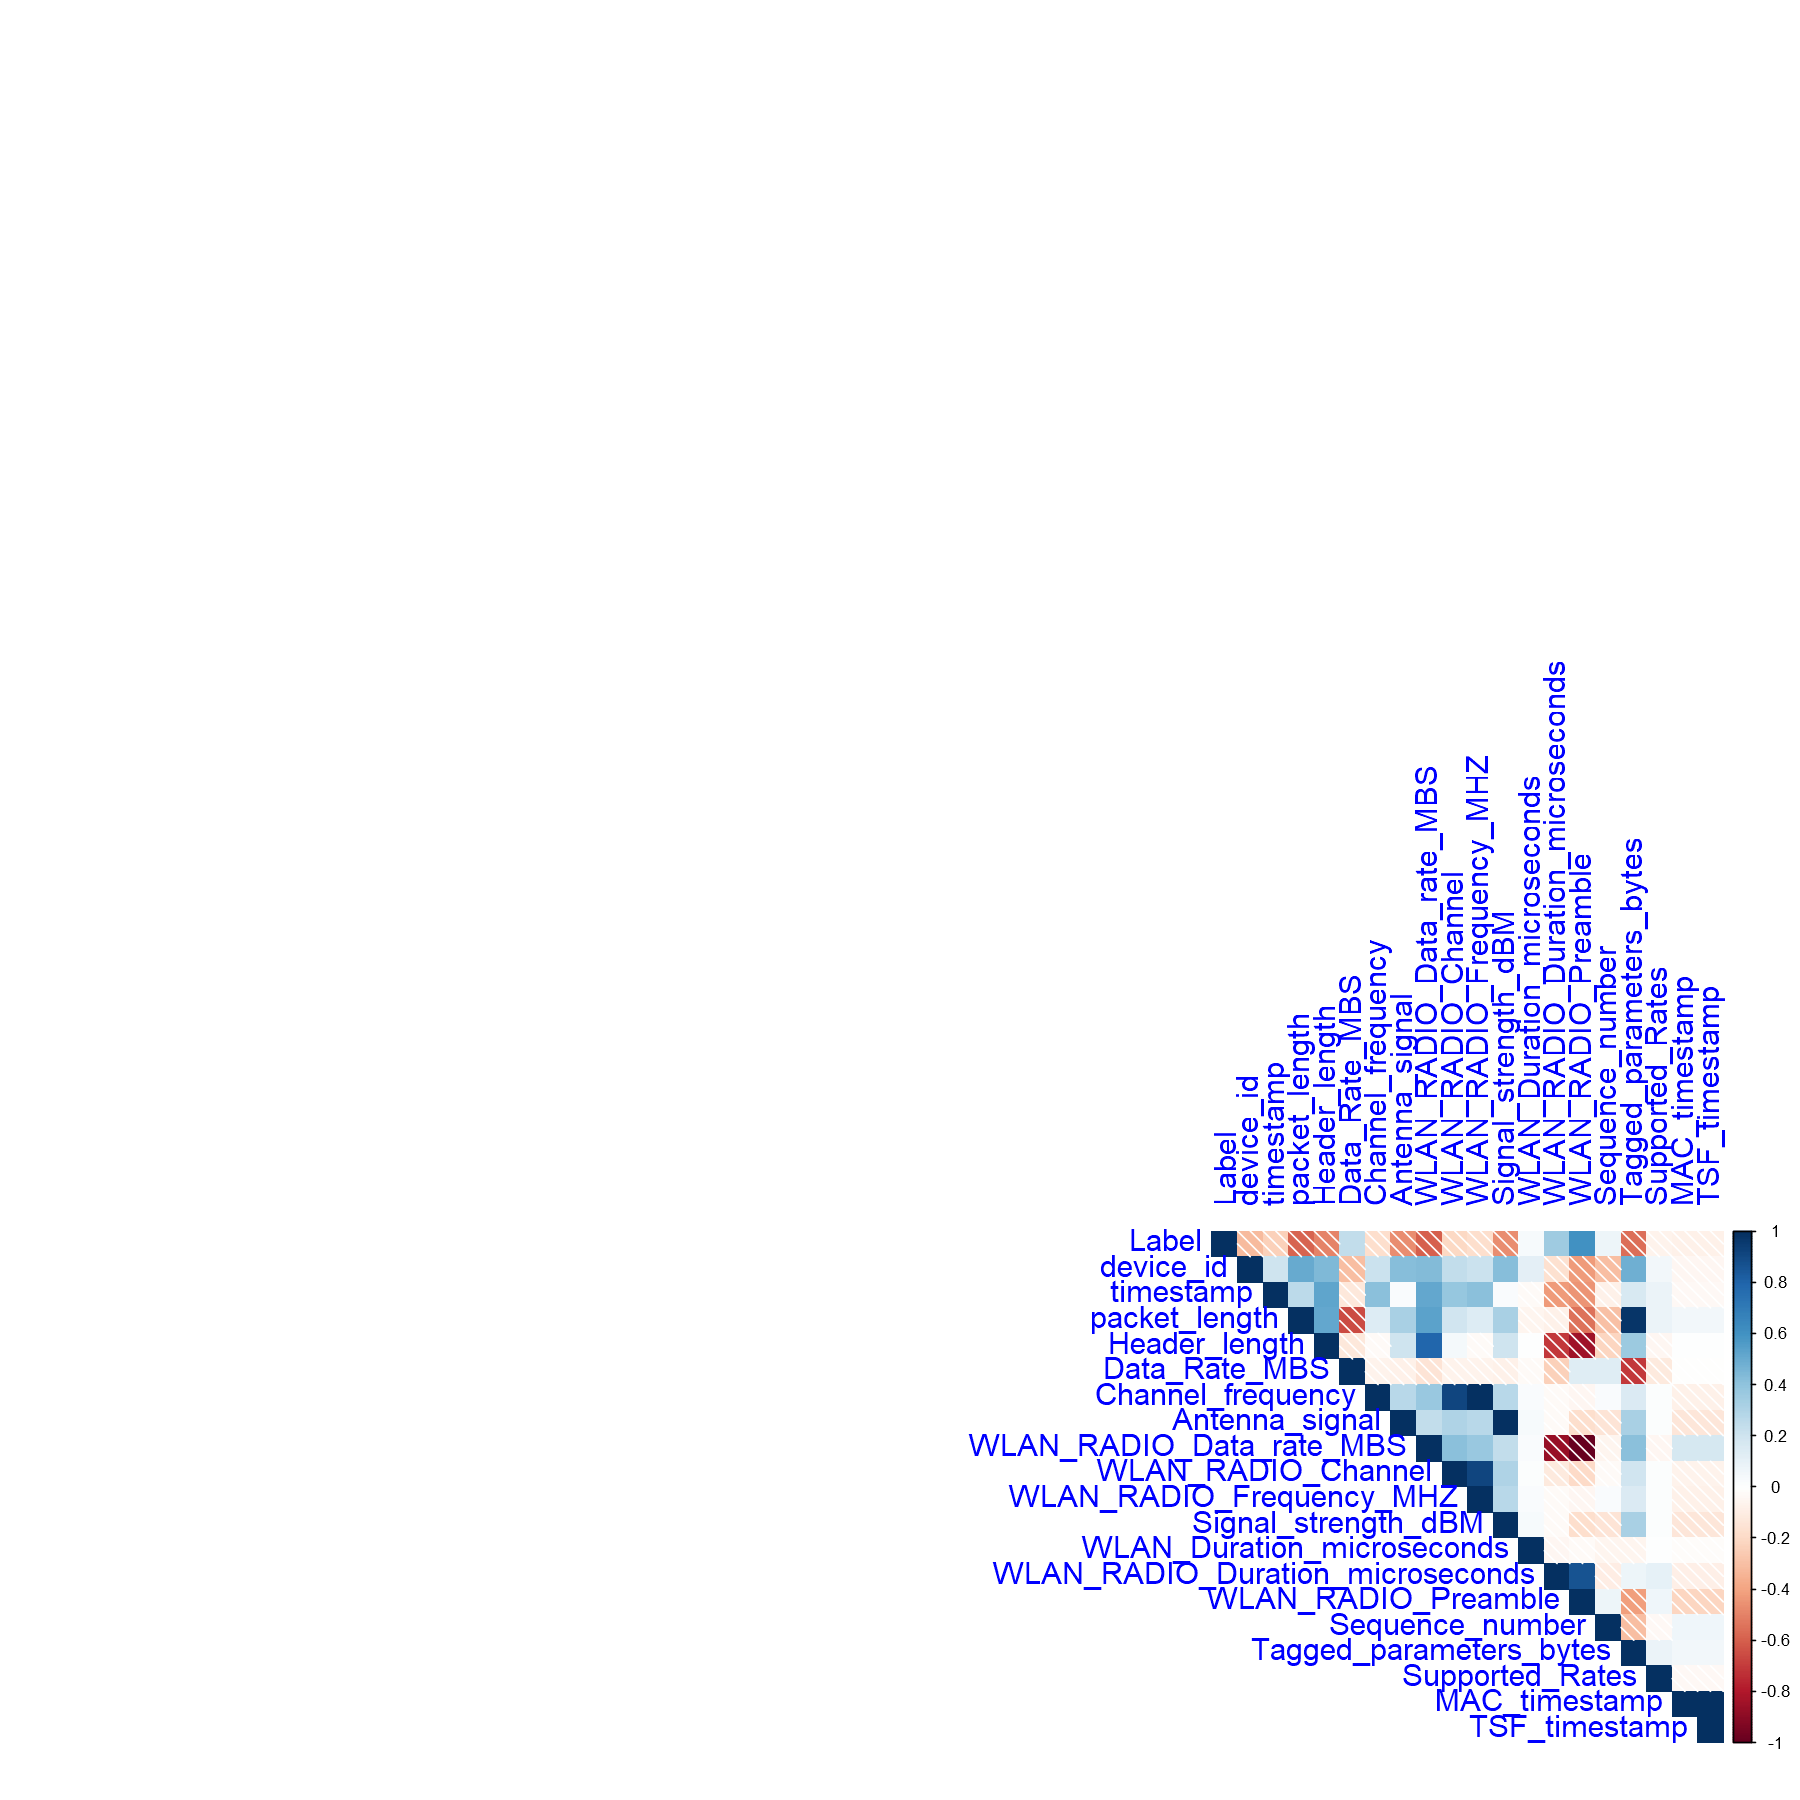

In [52]:
corrplot(res, method = "shade",type = "upper", is.corr = TRUE,tl.cex=1.5,tl.col = "Blue", tl.srt = 90, na.rm = TRUE)
options(repr.plot.width = 30, repr.plot.height = 30)


## Outliers

In [53]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),c("Label"))
    outdata <- data.frame(Label=data$Label)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[paste(v,'out',sep='_')] <- mv
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [54]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

Label device_id_out timestamp_out packet_length_out Header_length_out
1 10    0             1             0                 0                
2 10    0             1             0                 0                
3 10    0             1             0                 0                
4 10    0             1             0                 0                
5 10    0             1             0                 0                
6 10    0             1             0                 0                
  TSFT_out Flags_out Rate_out Channel_out dBm_Antenna_Noise_out ...
1 0        0         1        1           0                     ...
2 0        0         1        1           0                     ...
3 0        0         1        1           0                     ...
4 0        0         1        1           0                     ...
5 0        0         1        1           0                     ...
6 0        0         1        1           0                     ...
  WLAN_RADIO_Duration_microseconds_out WLAN_RADIO_Preamble_out WLAN_Version_out
1 0                                    0                       0               
2 0                                    0                       0               
3 0                                    0                       0               
4 0                                    0                       0               
5 0                                    0                       0               
6 0                                    0                       0               
  WLAN_Retry_out PWR_MGT_out Sequence_number_out Tagged_parameters_bytes_out
1 0              0           0                   0                          
2 0              0           0                   0                          
3 0              0           0                   0                          
4 0              0           0                   0                          
5 0              0           0                   0                          
6 0              0           0                   0                          
  Supported_Rates_out MAC_timestamp_out TSF_timestamp_out
1 0                   0                 0                
2 0                   0                 0                
3 0                   0                 0                
4 0                   0                 0                
5 0                   0                 0                
6 0                   0                 0

In [16]:
for (i in 2:length(df_outliers)){
    no_outliers <- df[[i]]
    no_outliers <- ifelse(df_outliers[[i]]==1, NA, no_outliers)
}


In [182]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in df) {
    outlier_values <- boxplot.stats(df[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

ERROR: Error: cannot allocate vector of size 711 Kb


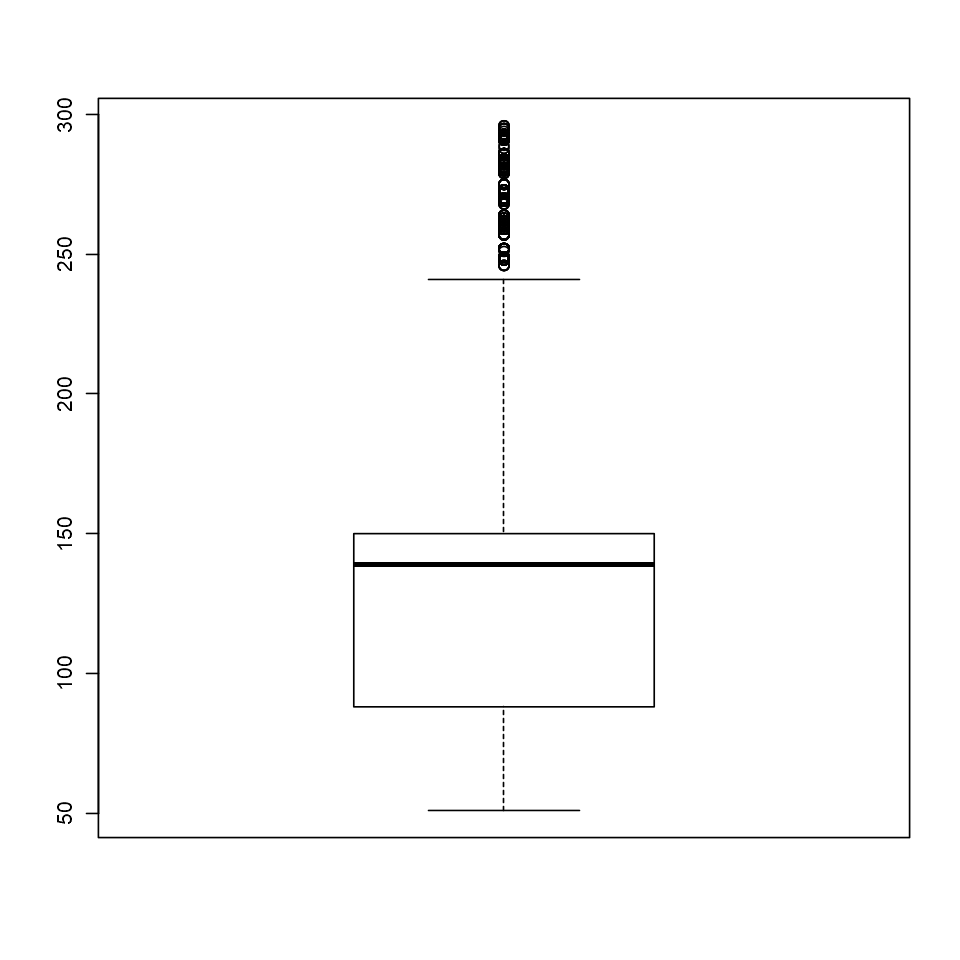

In [20]:
boxplot(df$packet_length)

## Missingness

In [183]:
getMissingness(df)

list(var = c(12, 14, 15, 16, 17, 18, 19, 28, 46, 47), na_count = c(102330, 102330, 102330, 102330, 102330, 102330, 102330, 102330, 74301, 74301), rate = c(56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 40.8, 40.8))This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows.



$missingness
                                var na_count rate
1                               CFP   102330 56.2
2                               WEP   102330 56.2
3                     Fragmentation   102330 56.2
4                        FCS_at_end   102330 56.2
5                           DataPad   102330 56.2
6                           Bad_FCS   102330 56.2
7                          Short_GI   102330 56.2
8                    Short_preamble   102330 56.2
9                     MAC_timestamp    74301 40.8
10                    TSF_timestamp    74301 40.8
11                         Bad_PLCP    27895 15.3
12 WLAN_RADIO_Duration_microseconds    27444 15.1
13              WLAN_RADIO_Preamble    27444 15.1
14                  Supported_Rates        1  0.0

$message
[1] "This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows."

$rows
NULL

In [184]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Label")
    missdata <- data.frame(Label=data$Label)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

Label device_id timestamp packet_length Header_length TSFT Flags Rate Channel
1 10    0         0         0             0             0    0     0    0      
2 10    0         0         0             0             0    0     0    0      
3 10    0         0         0             0             0    0     0    0      
4 10    0         0         0             0             0    0     0    0      
5 10    0         0         0             0             0    0     0    0      
6 10    0         0         0             0             0    0     0    0      
  dBm_Antenna_Noise ... PWR_MGT Destination_address Source_address BSS_Id
1 0                 ... 0       0                   0              0     
2 0                 ... 0       0                   0              0     
3 0                 ... 0       0                   0              0     
4 0                 ... 0       0                   0              0     
5 0                 ... 0       0                   0              0     
6 0                 ... 0       0                   0              0     
  Sequence_number Tagged_parameters_bytes SSID Supported_Rates MAC_timestamp
1 0               0                       0    0               0            
2 0               0                       0    0               0            
3 0               0                       0    0               0            
4 0               0                       0    0               0            
5 0               0                       0    0               0            
6 0               0                       0    0               0            
  TSF_timestamp
1 0            
2 0            
3 0            
4 0            
5 0            
6 0

Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


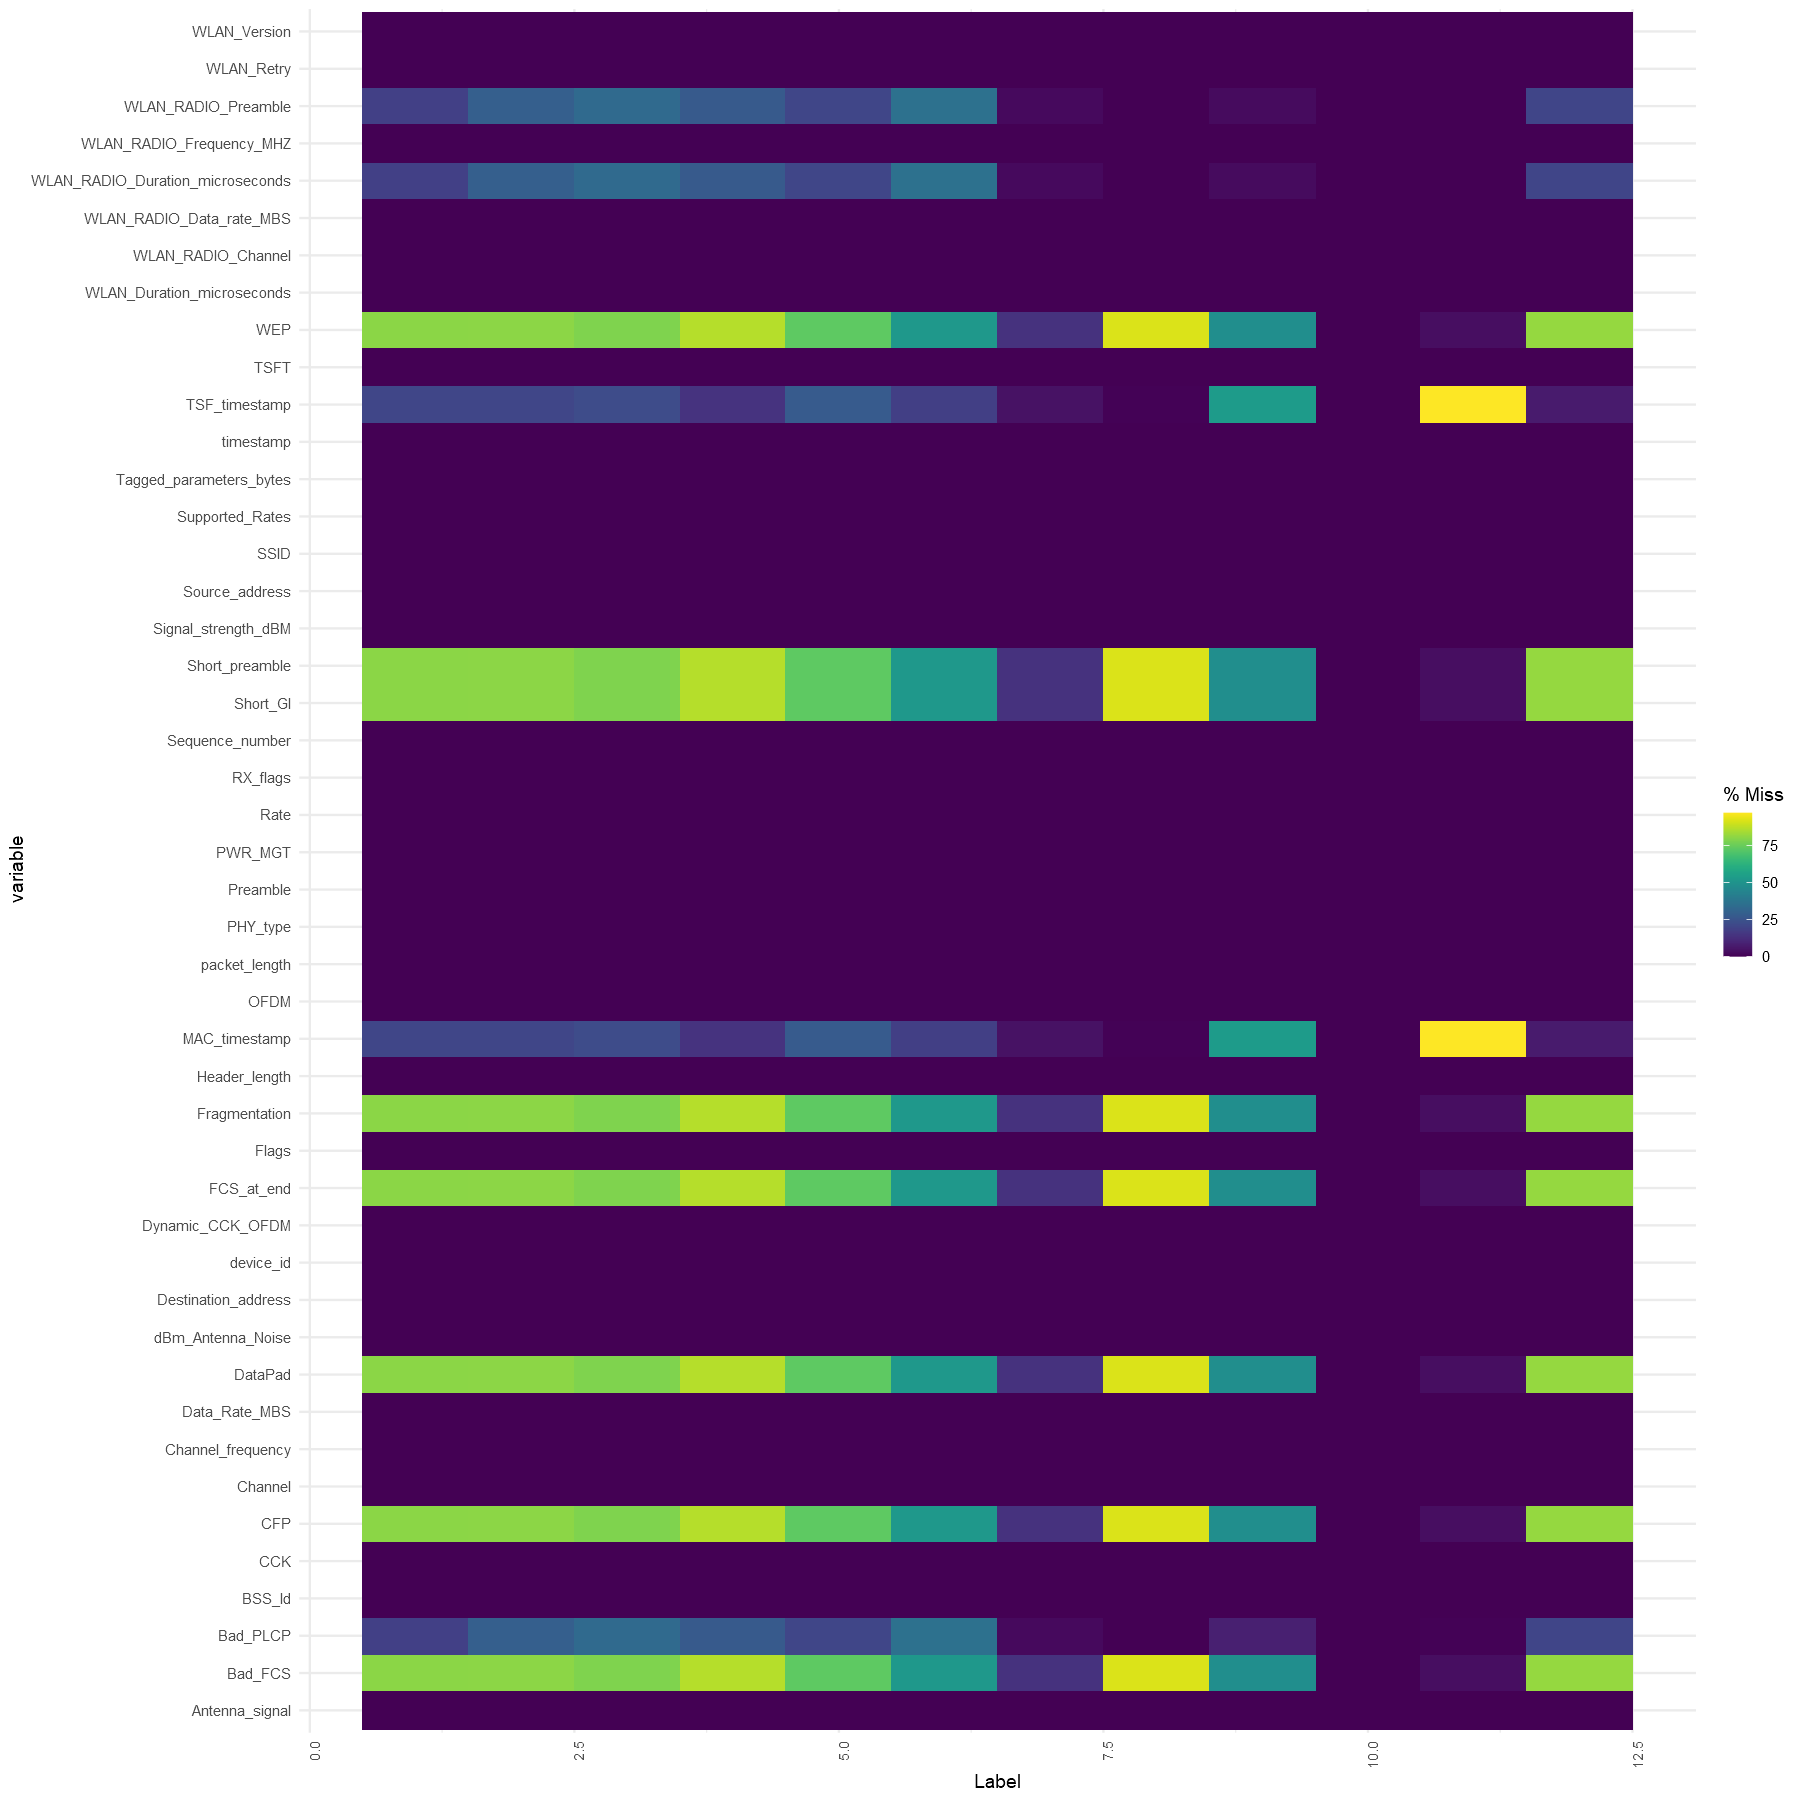

In [185]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Label) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with(blue) / without outliers(red)

In [57]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[paste(v,'out',sep='_')] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

In [58]:
df.out <- outlierMatrix(df)

Joining, by = c("Label", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("device_id", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("timestamp", "outliers")



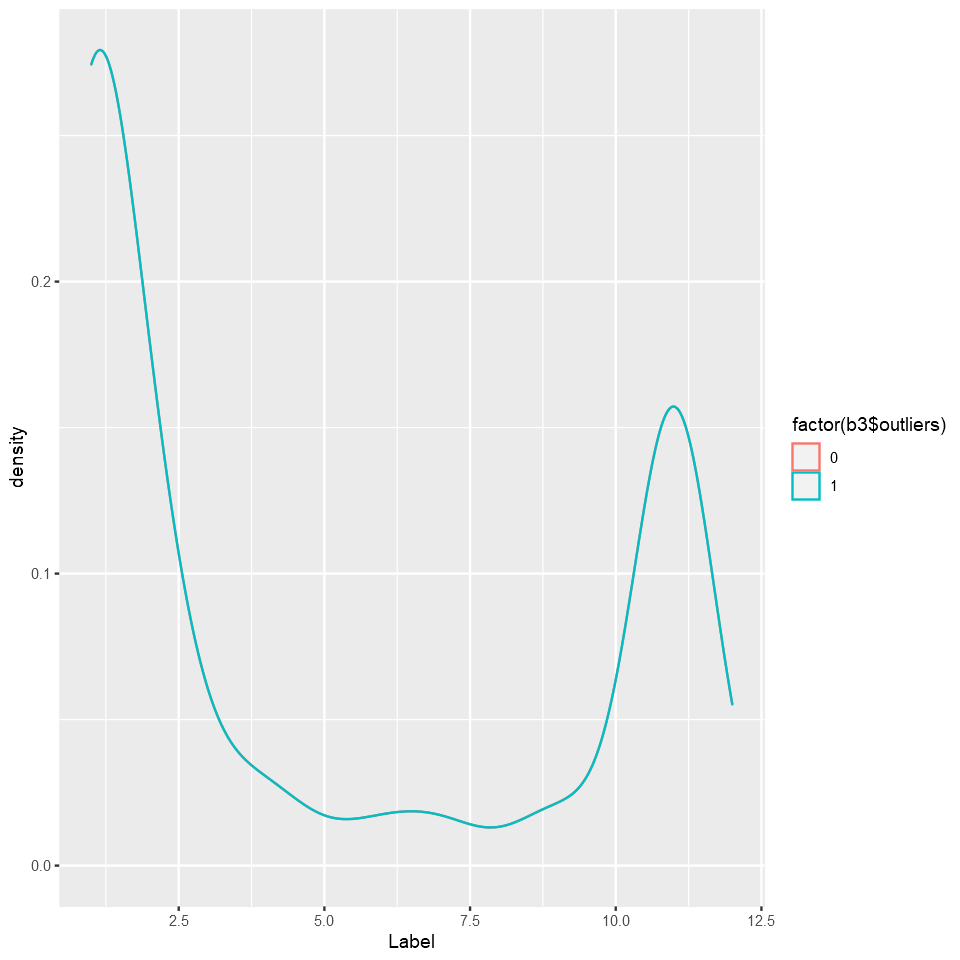

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("packet_length", "outliers")



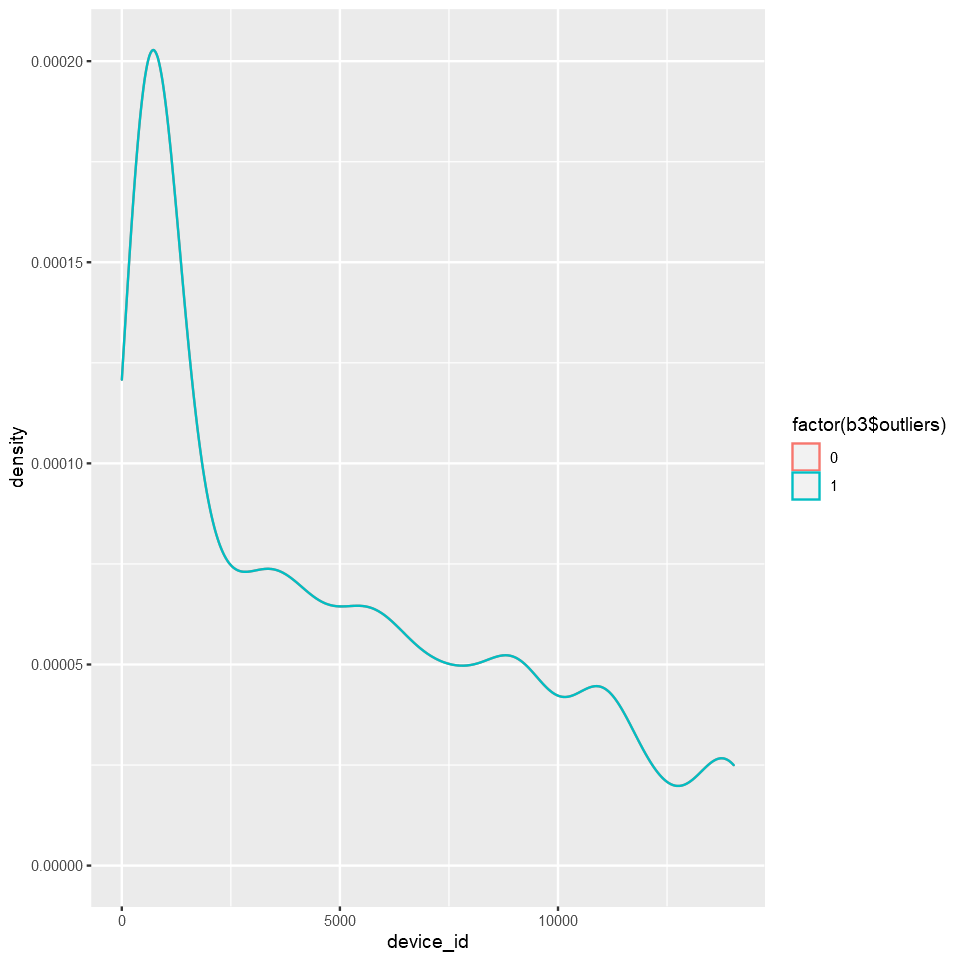

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Header_length", "outliers")



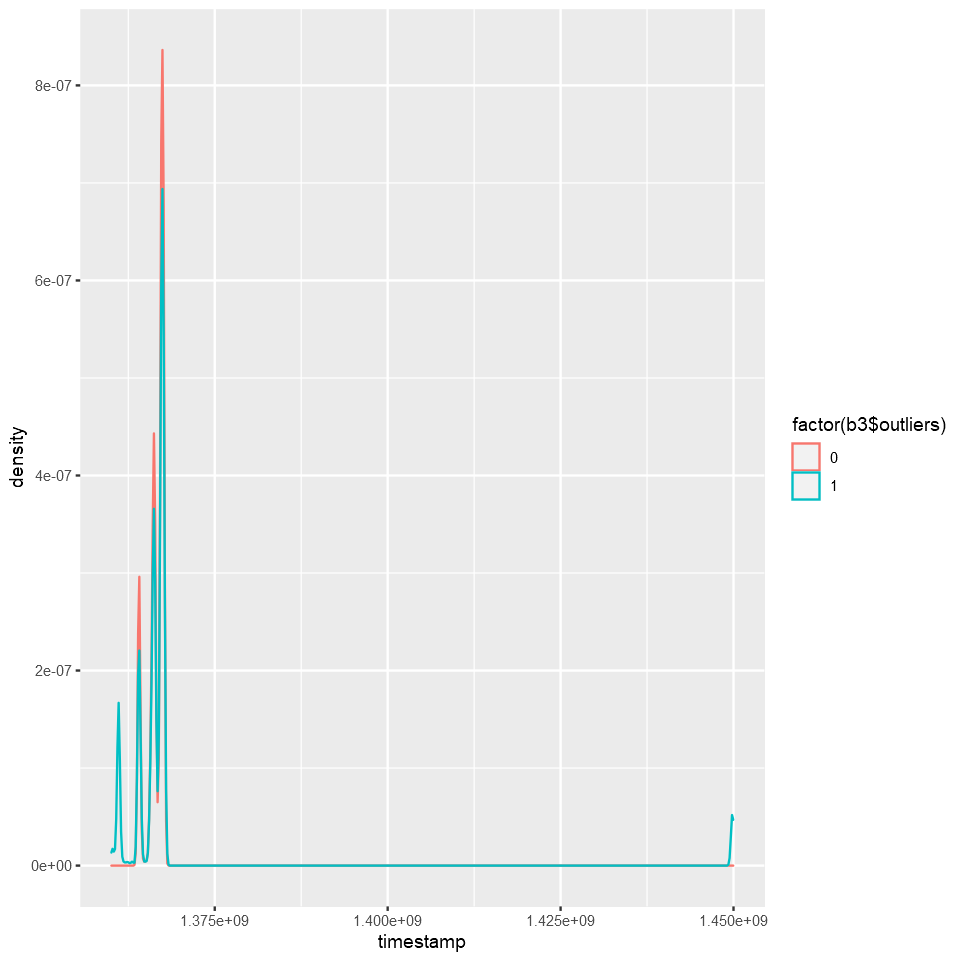

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Data_Rate_MBS", "outliers")



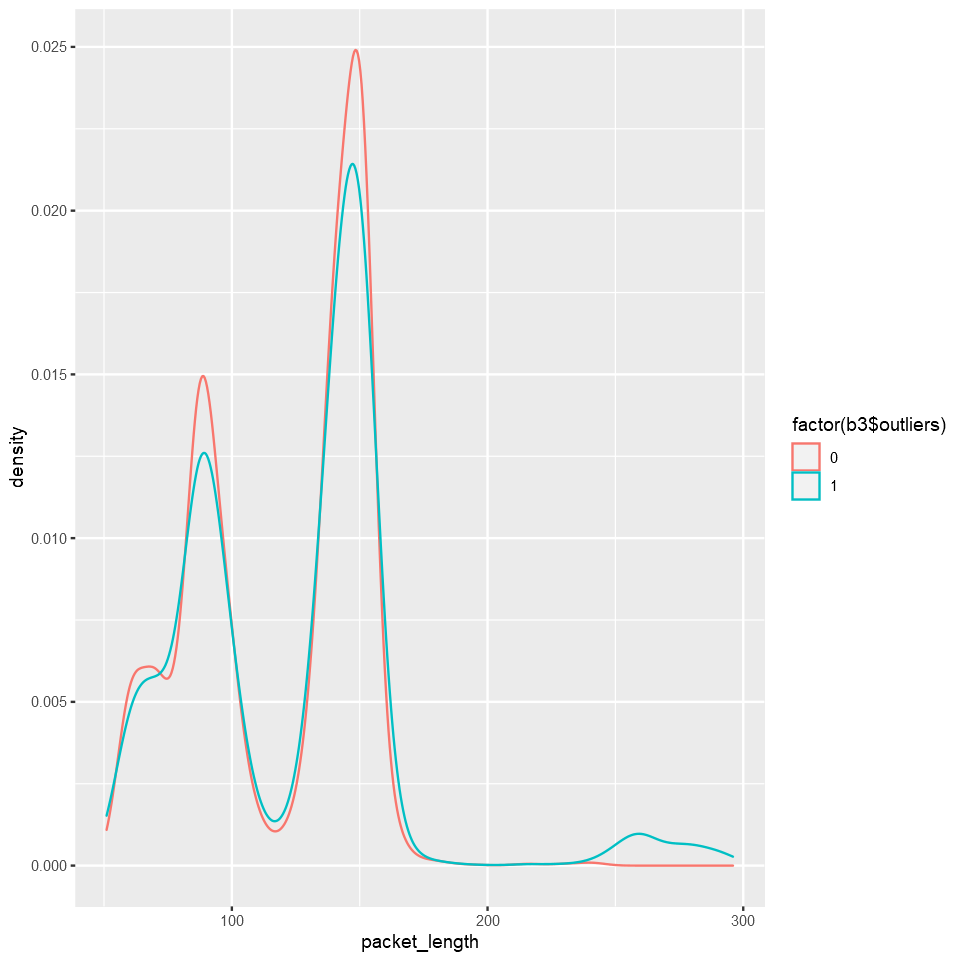

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Channel_frequency", "outliers")



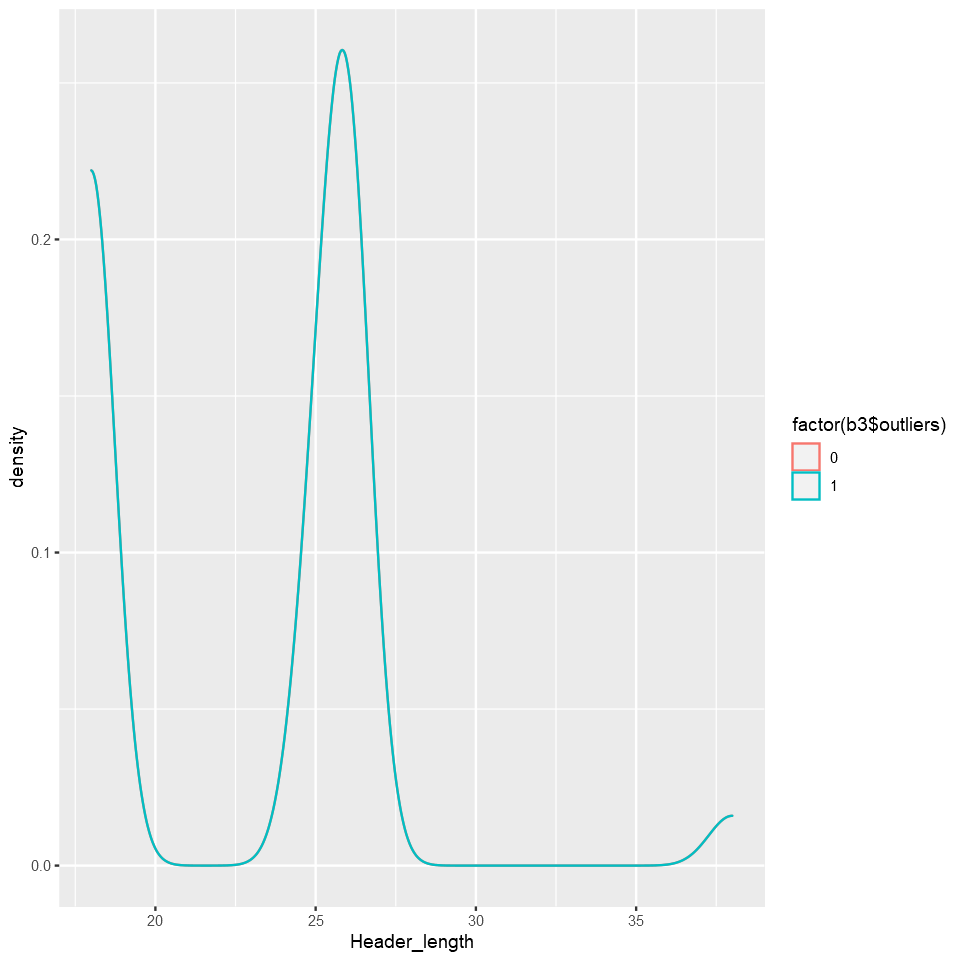

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Antenna_signal", "outliers")



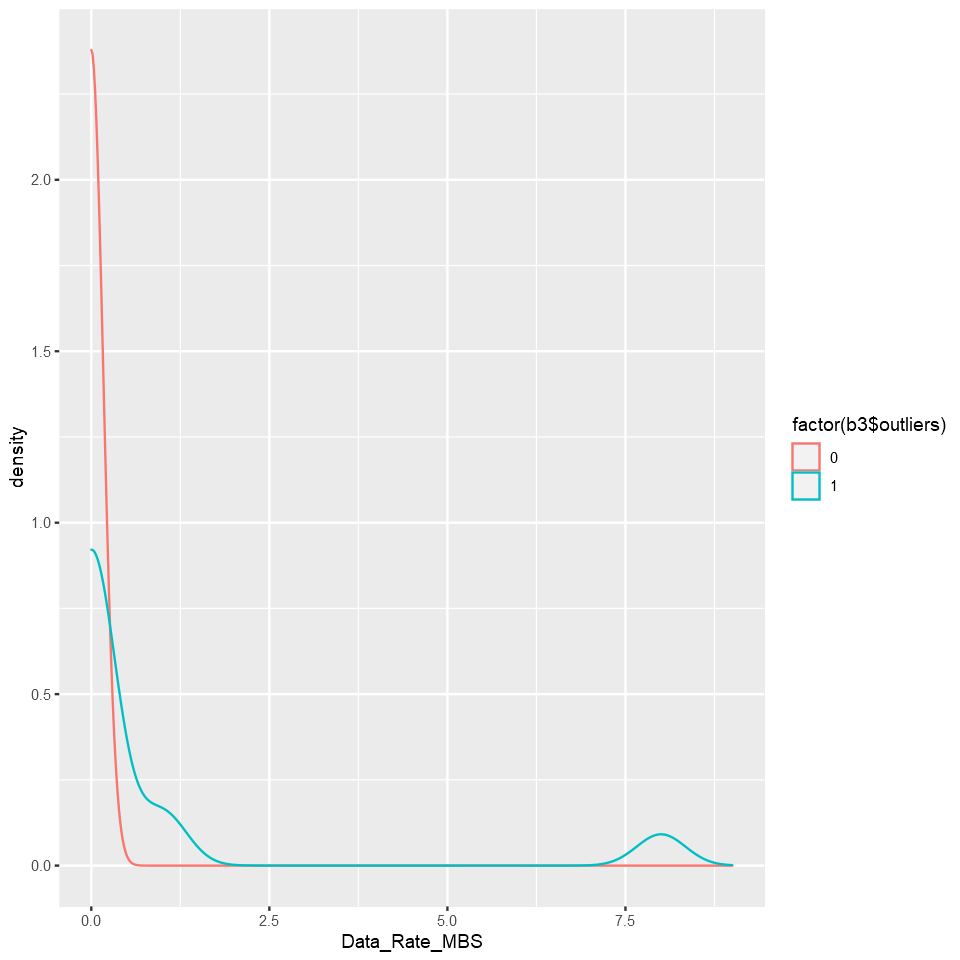

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("WLAN_RADIO_Data_rate_MBS", "outliers")



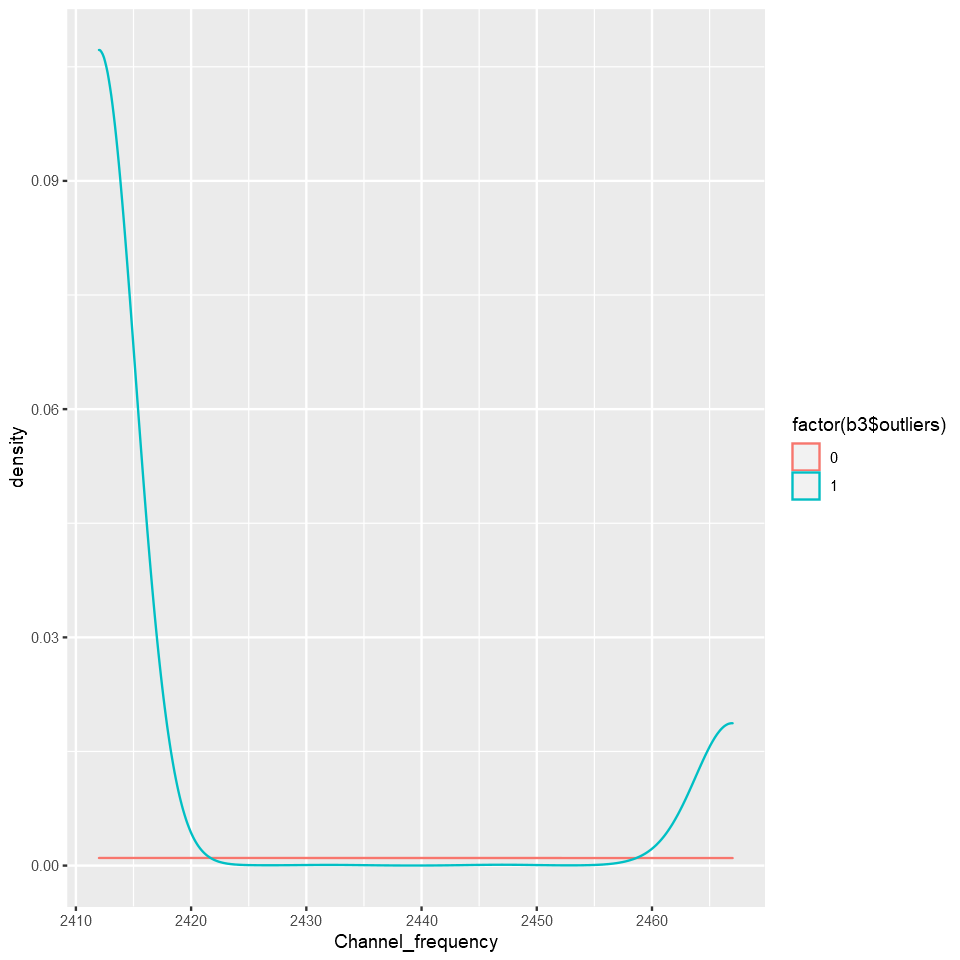

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("WLAN_RADIO_Channel", "outliers")



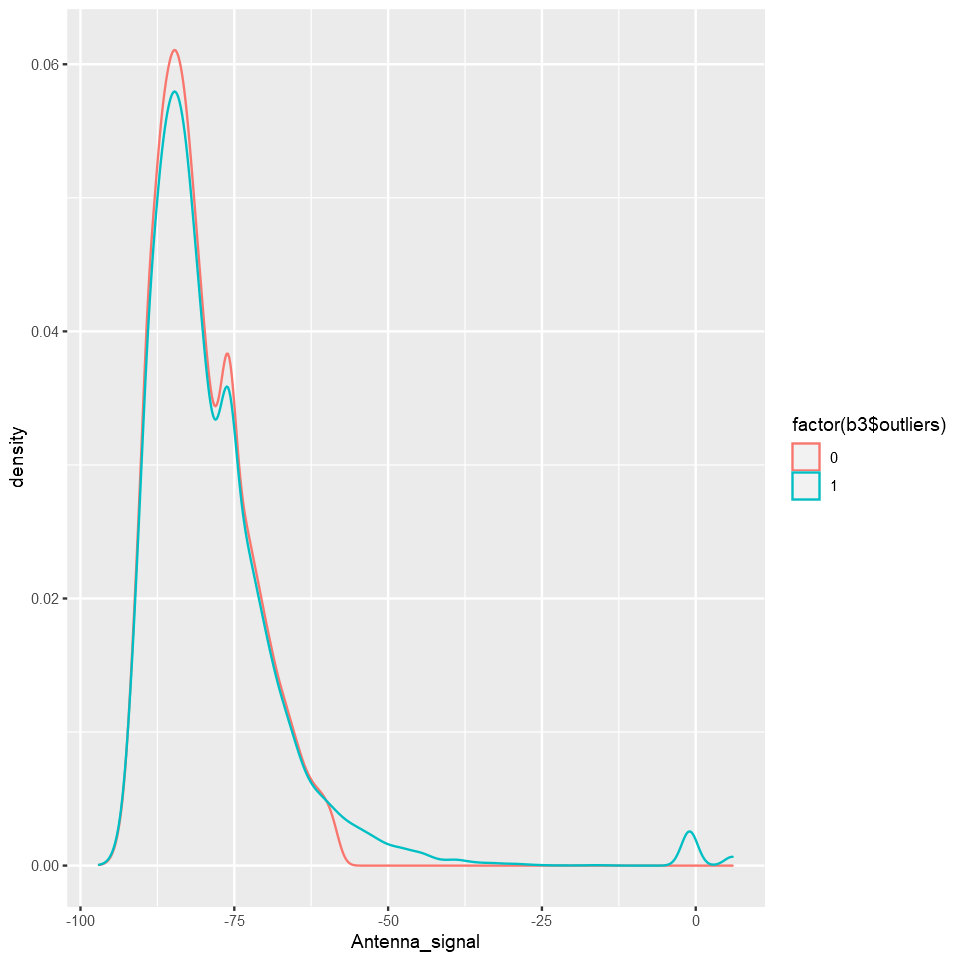

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("WLAN_RADIO_Frequency_MHZ", "outliers")



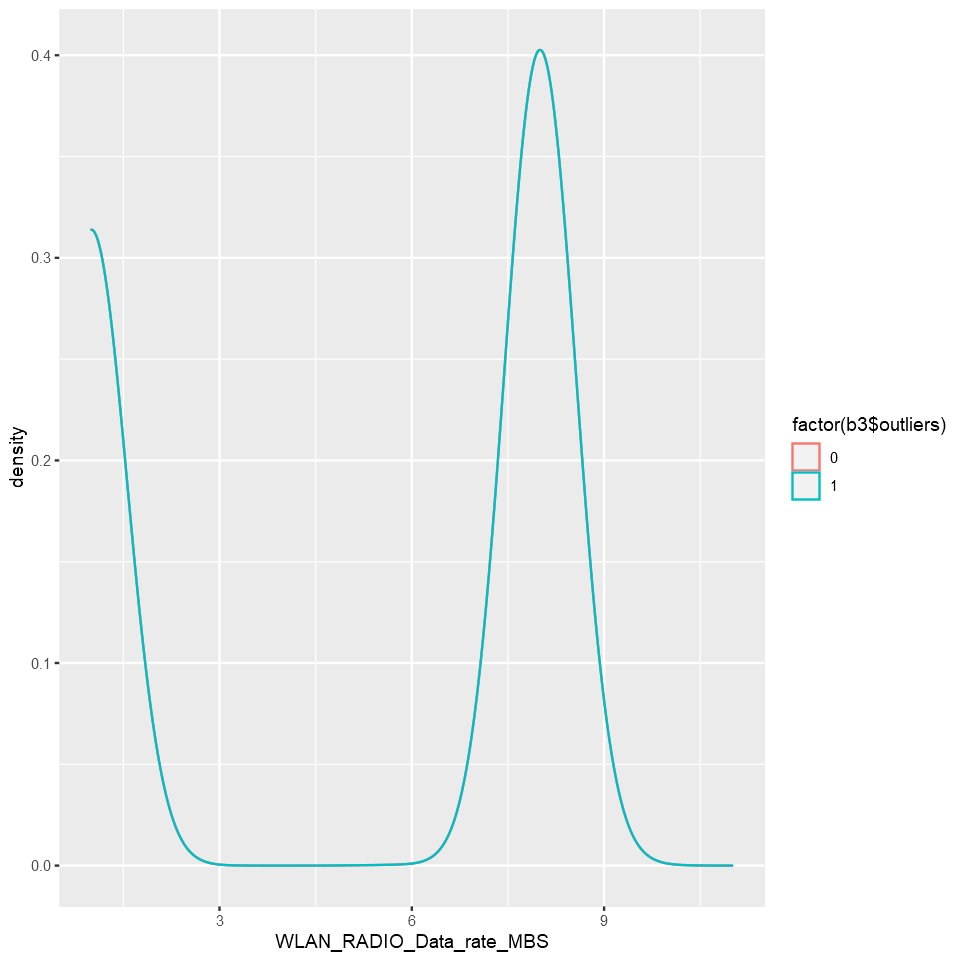

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Signal_strength_dBM", "outliers")



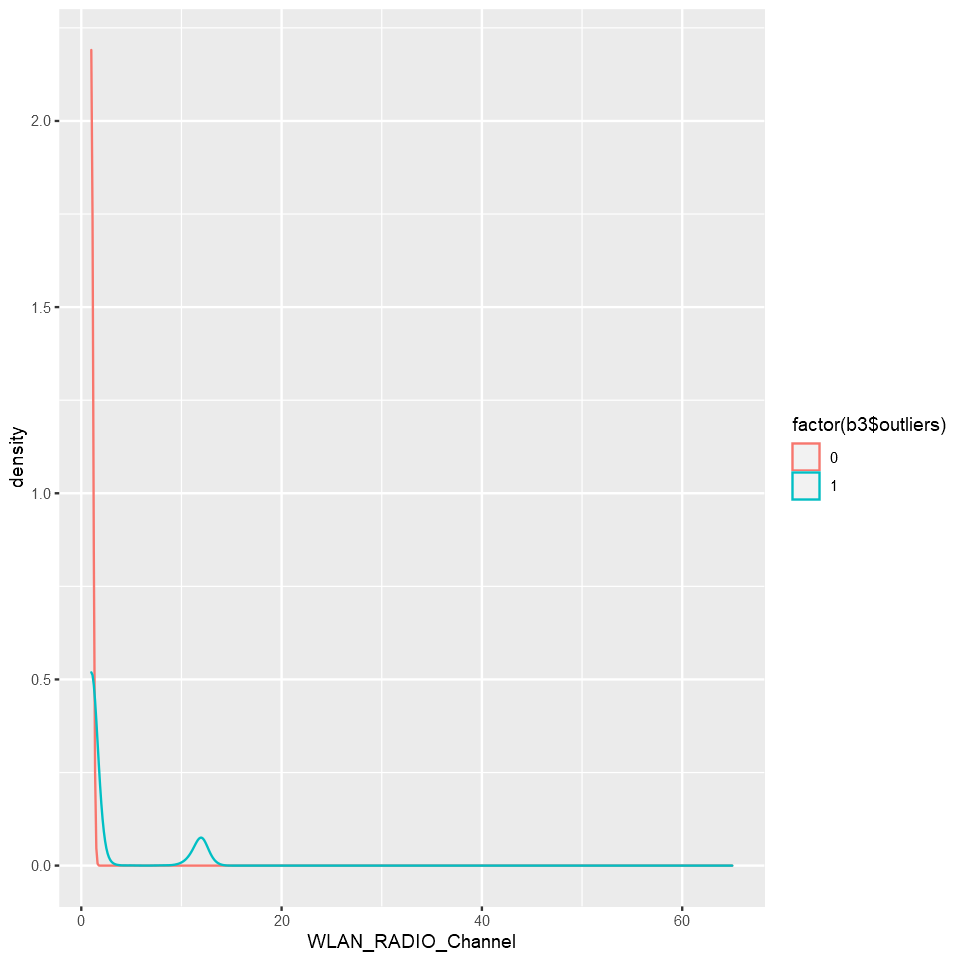

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("WLAN_Duration_microseconds", "outliers")



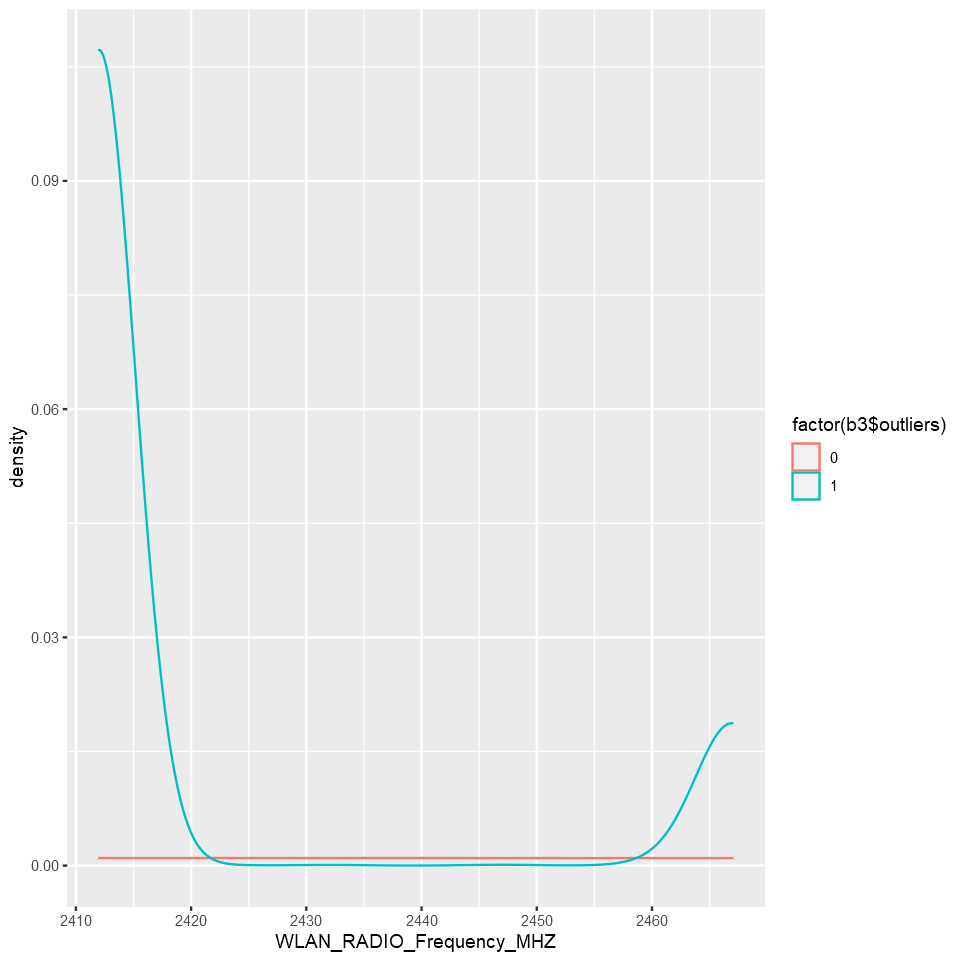

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("WLAN_RADIO_Duration_microseconds", "outliers")



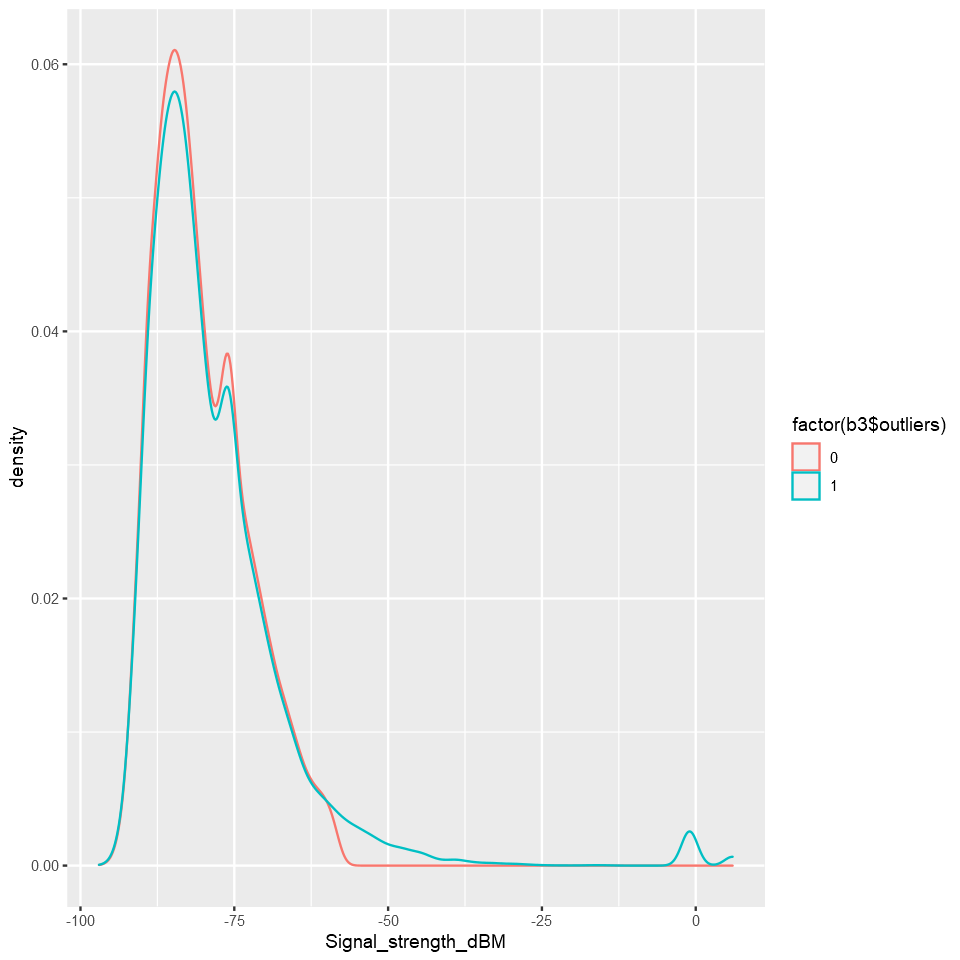

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 27444 rows containing non-finite values (stat_density)."
Joining, by = c("WLAN_RADIO_Preamble", "outliers")



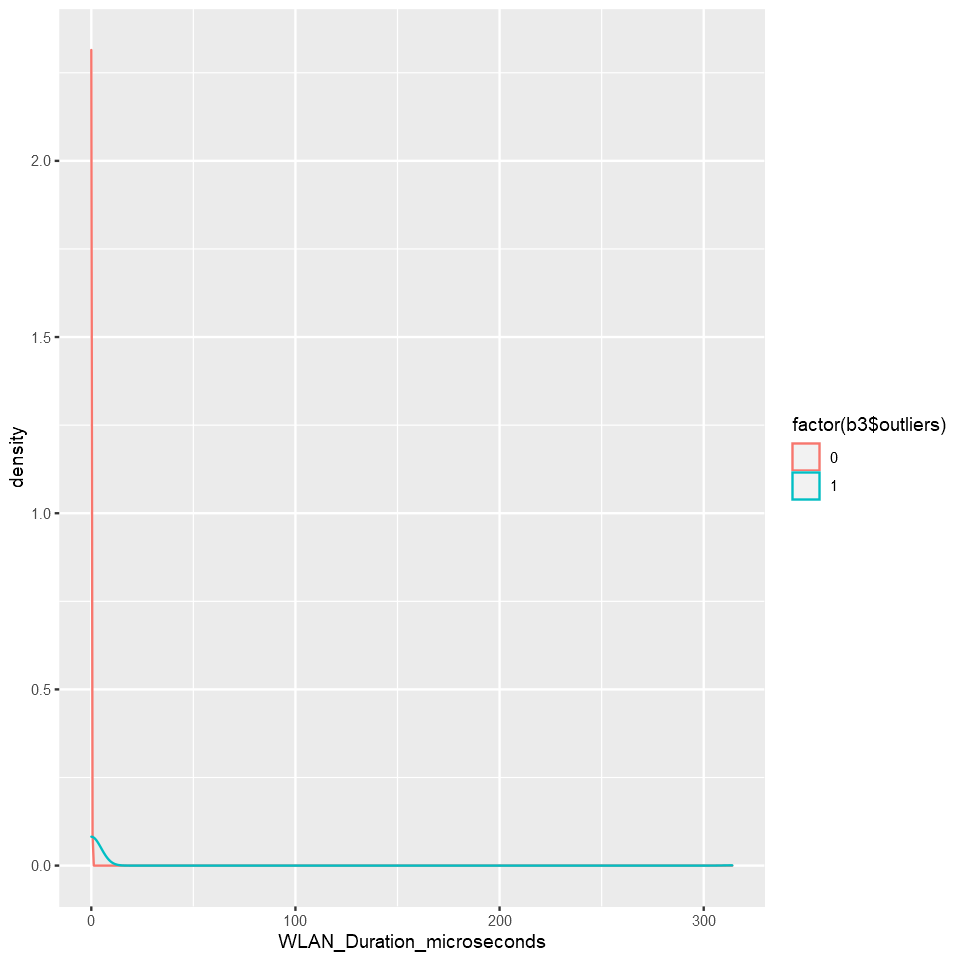

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 27444 rows containing non-finite values (stat_density)."
Joining, by = c("Sequence_number", "outliers")



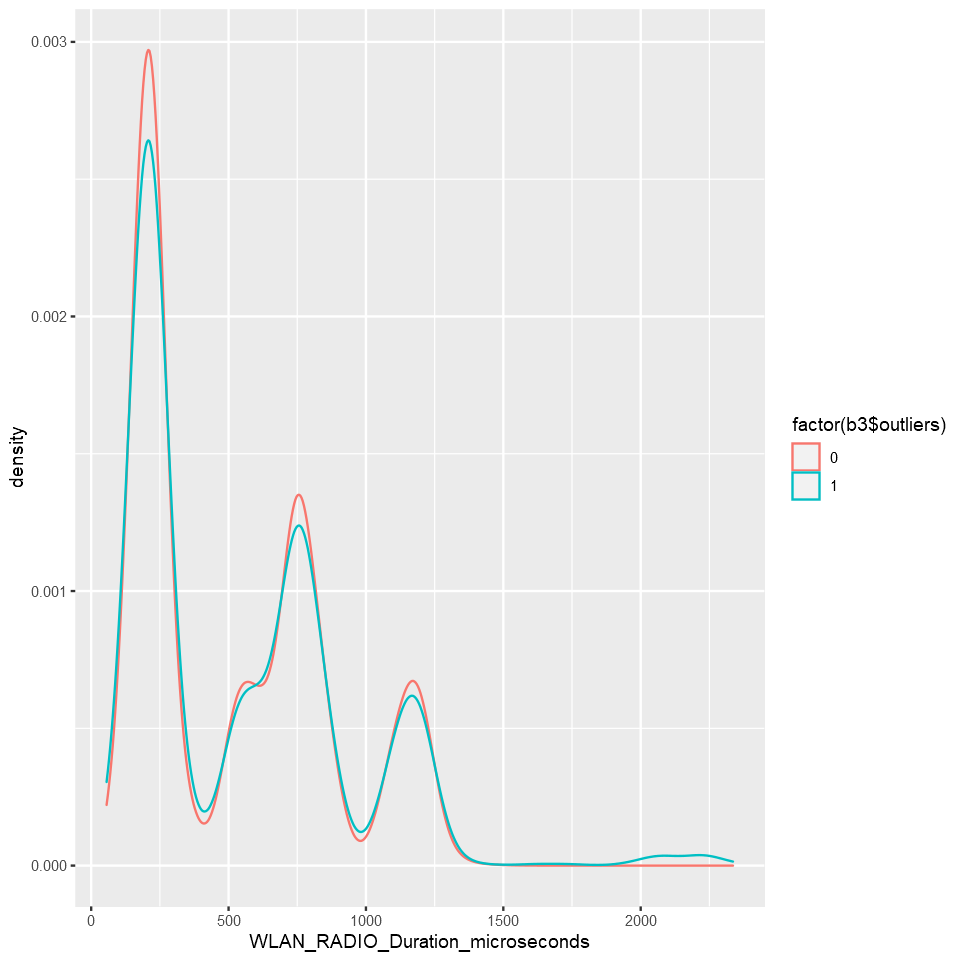

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Tagged_parameters_bytes", "outliers")



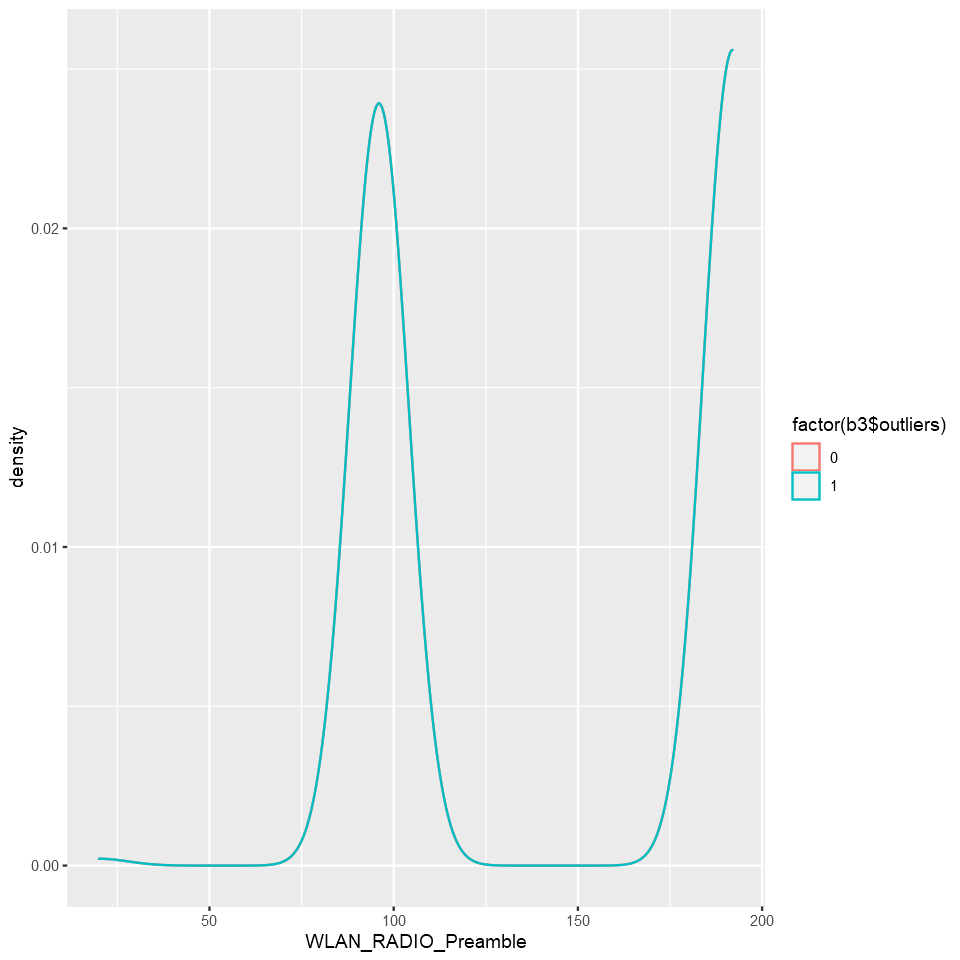

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("Supported_Rates", "outliers")



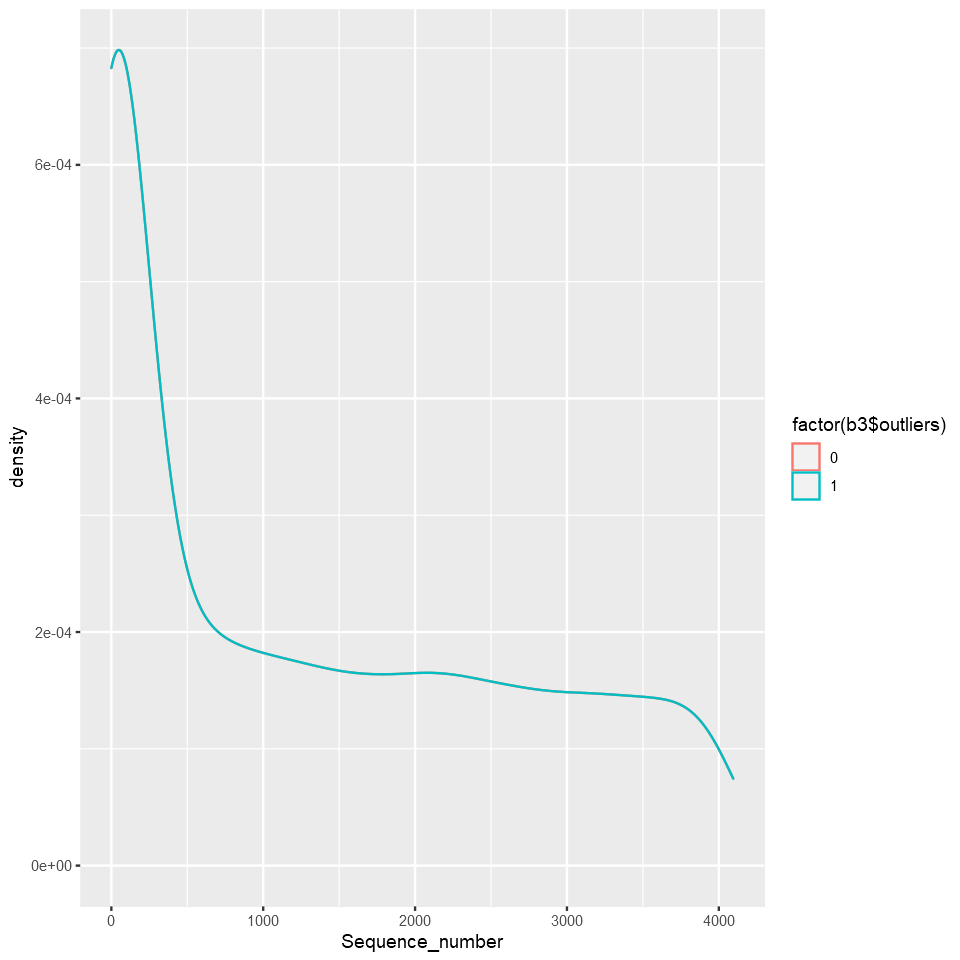

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 1 rows containing non-finite values (stat_density)."
Joining, by = c("MAC_timestamp", "outliers")



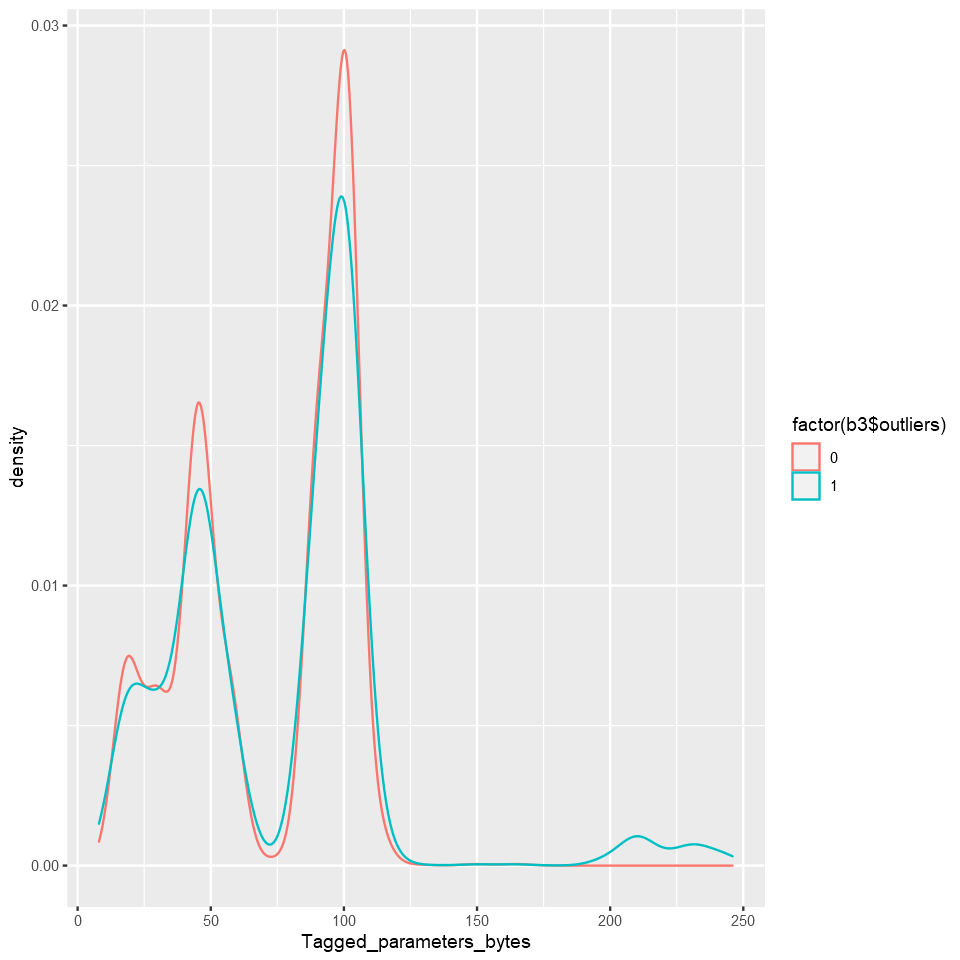

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 74301 rows containing non-finite values (stat_density)."
Joining, by = c("TSF_timestamp", "outliers")



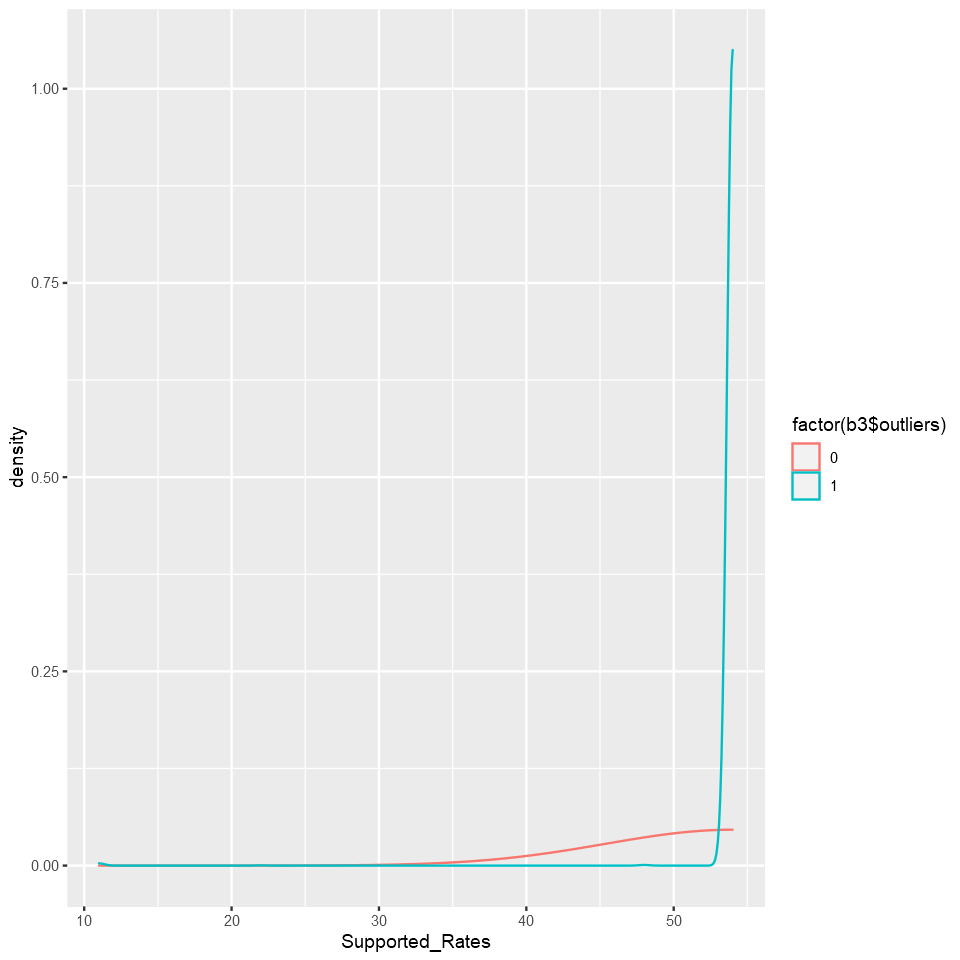

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 74301 rows containing non-finite values (stat_density)."


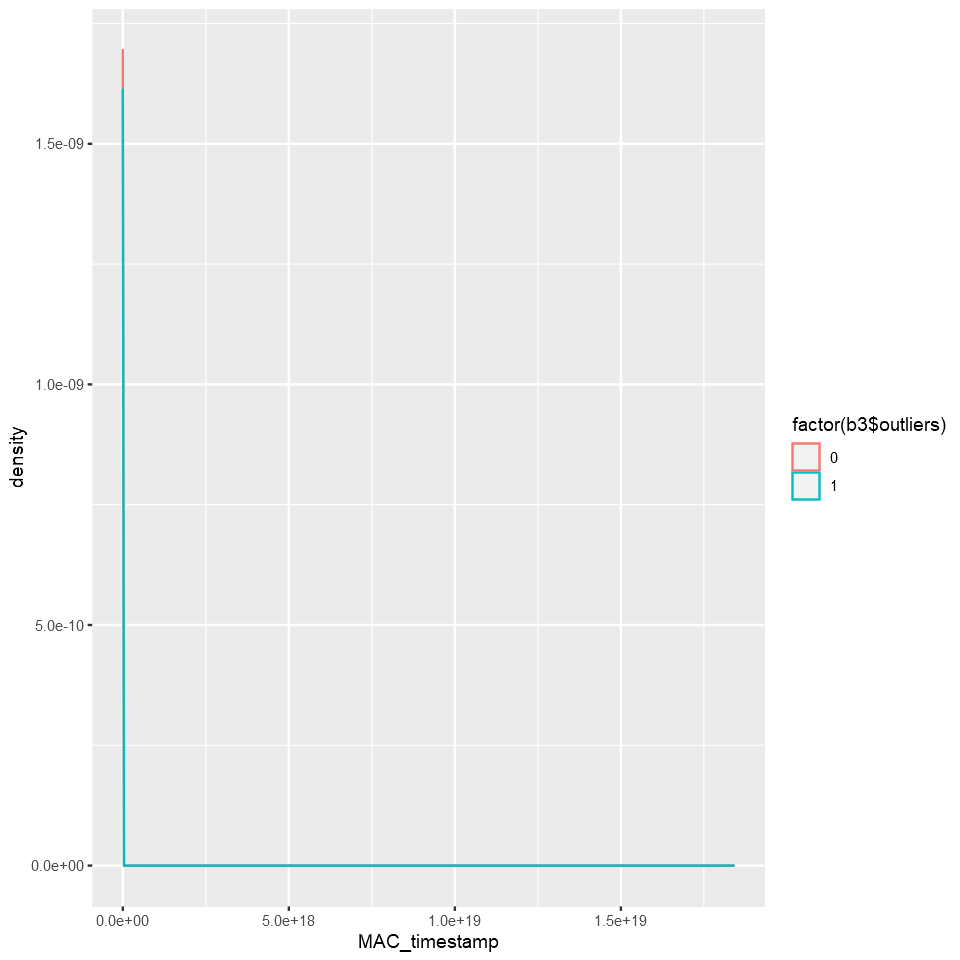

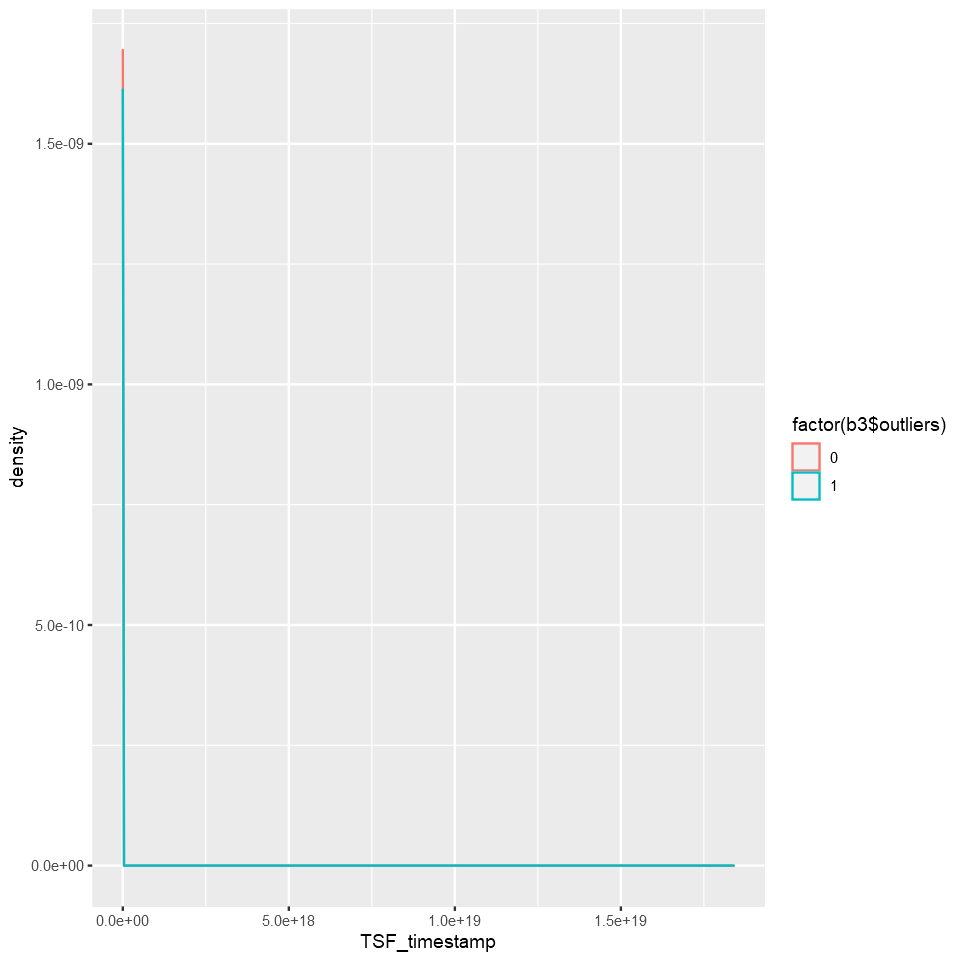

In [60]:
for (v in continuous) {
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2))
}

### Influence on outcome

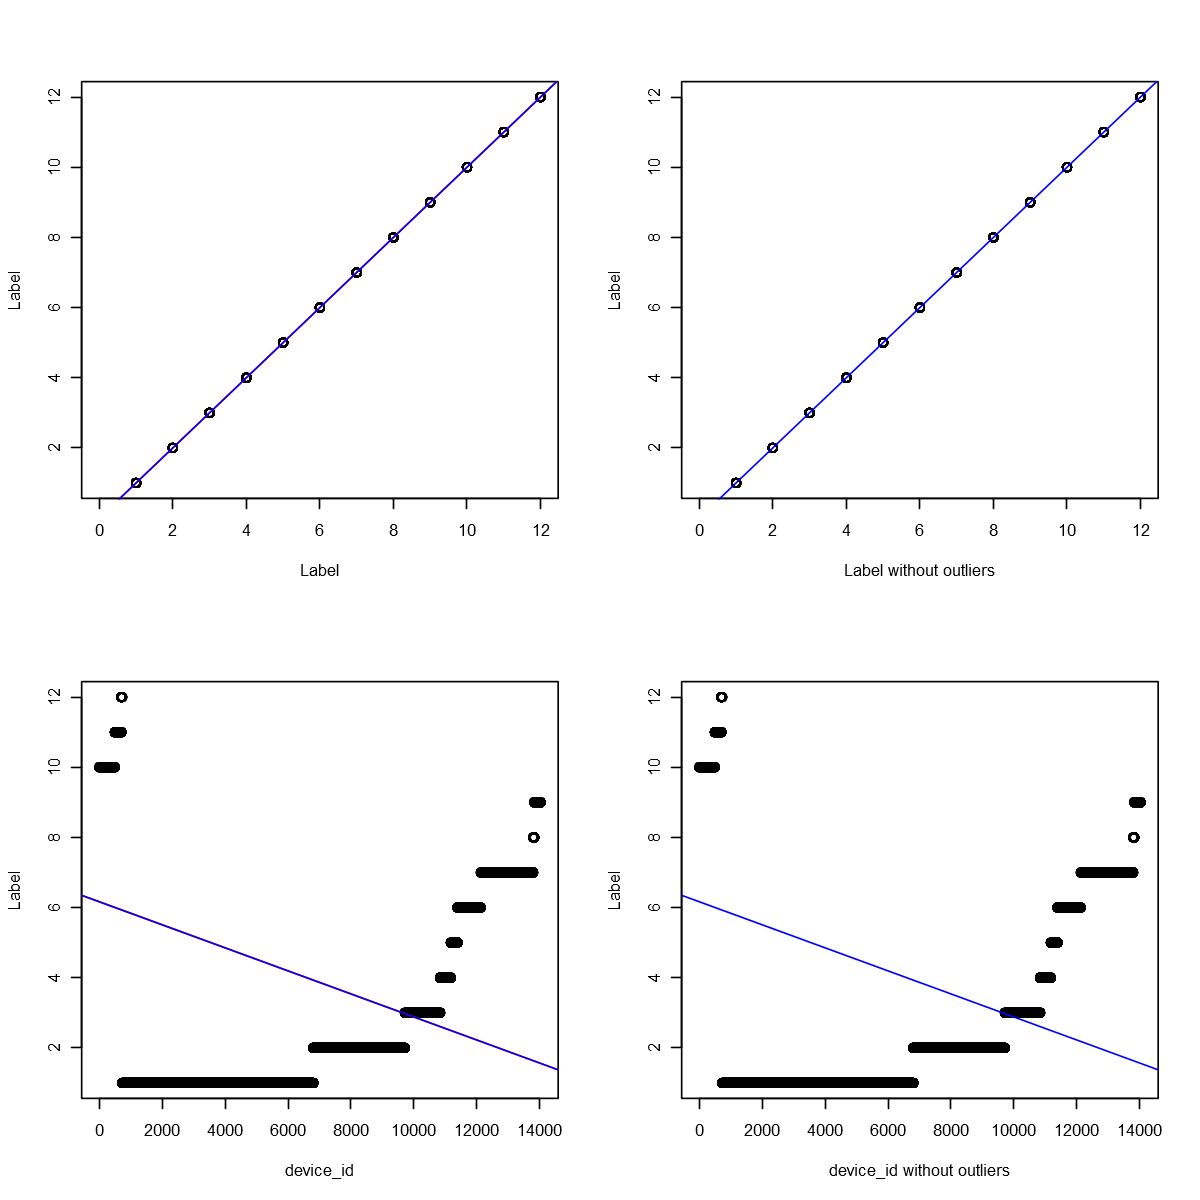

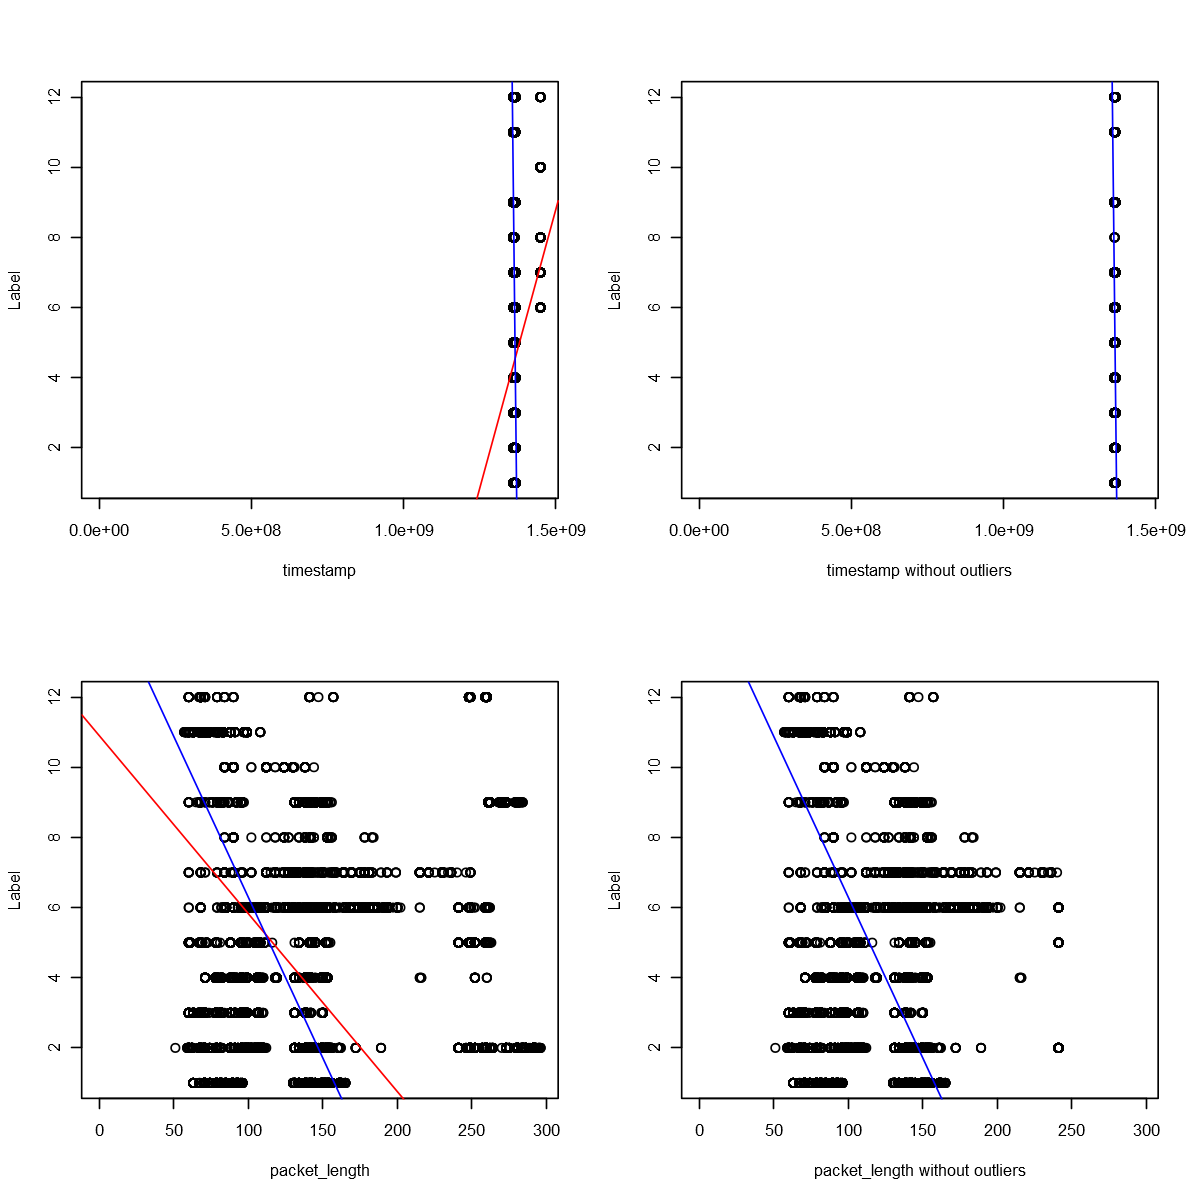

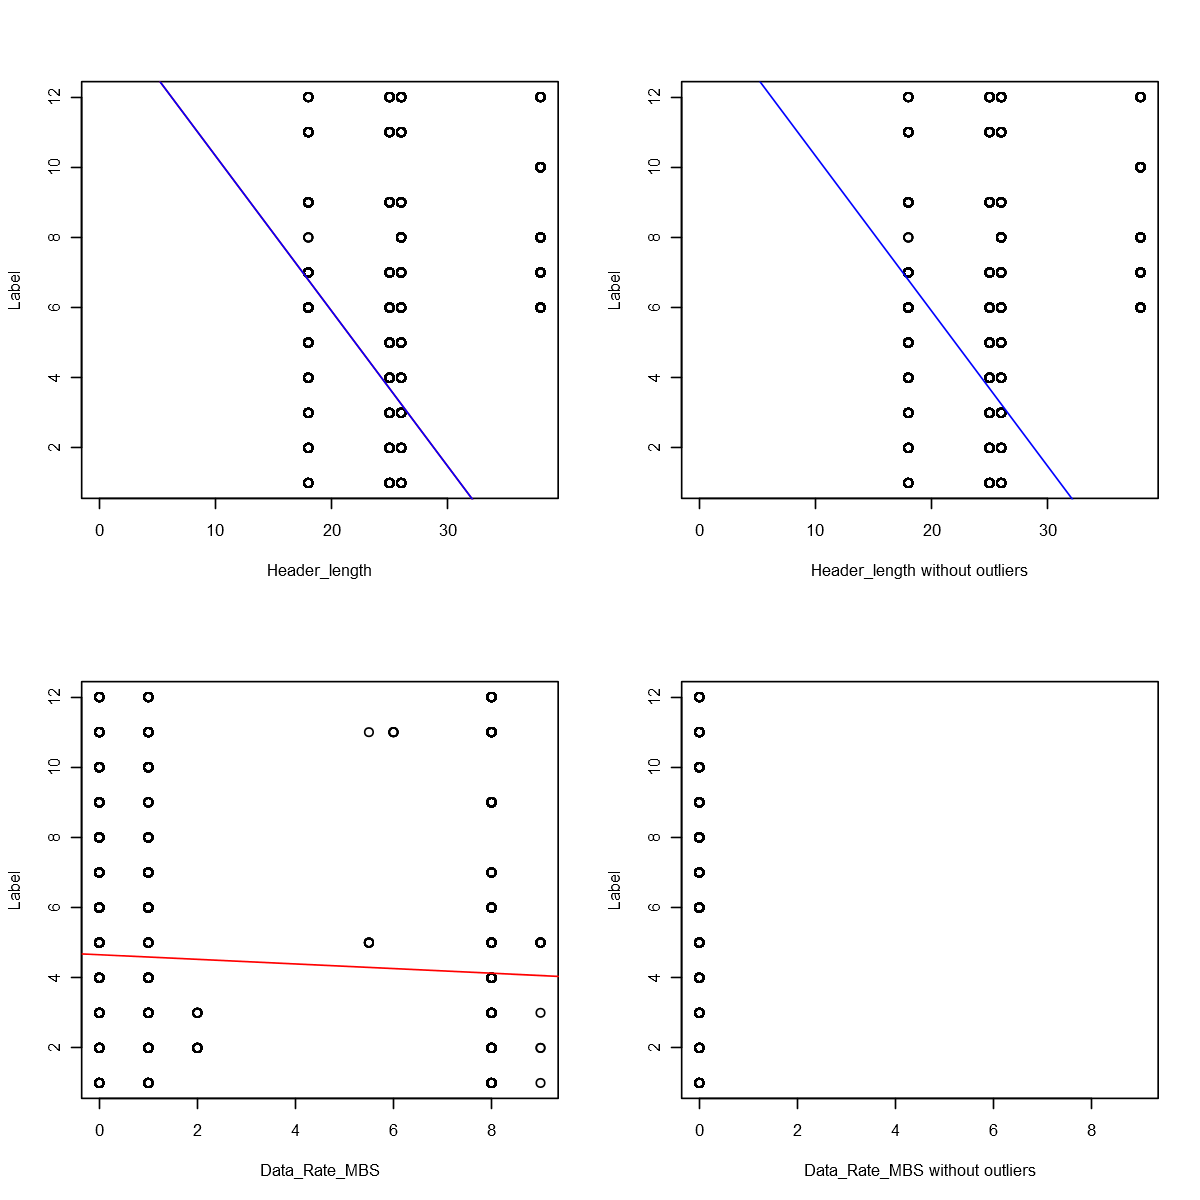

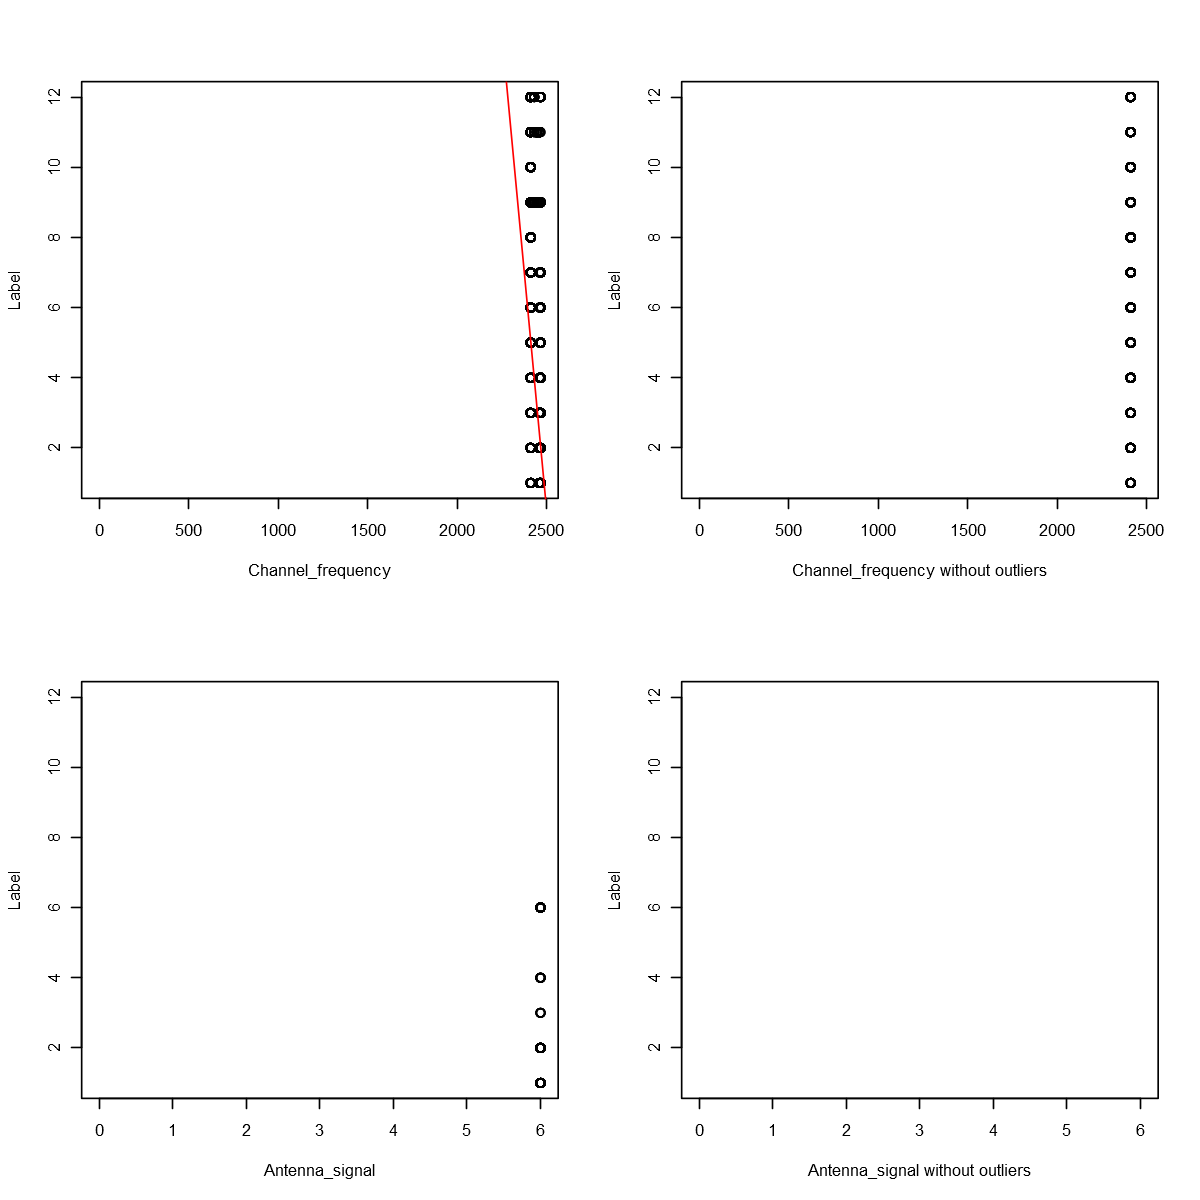

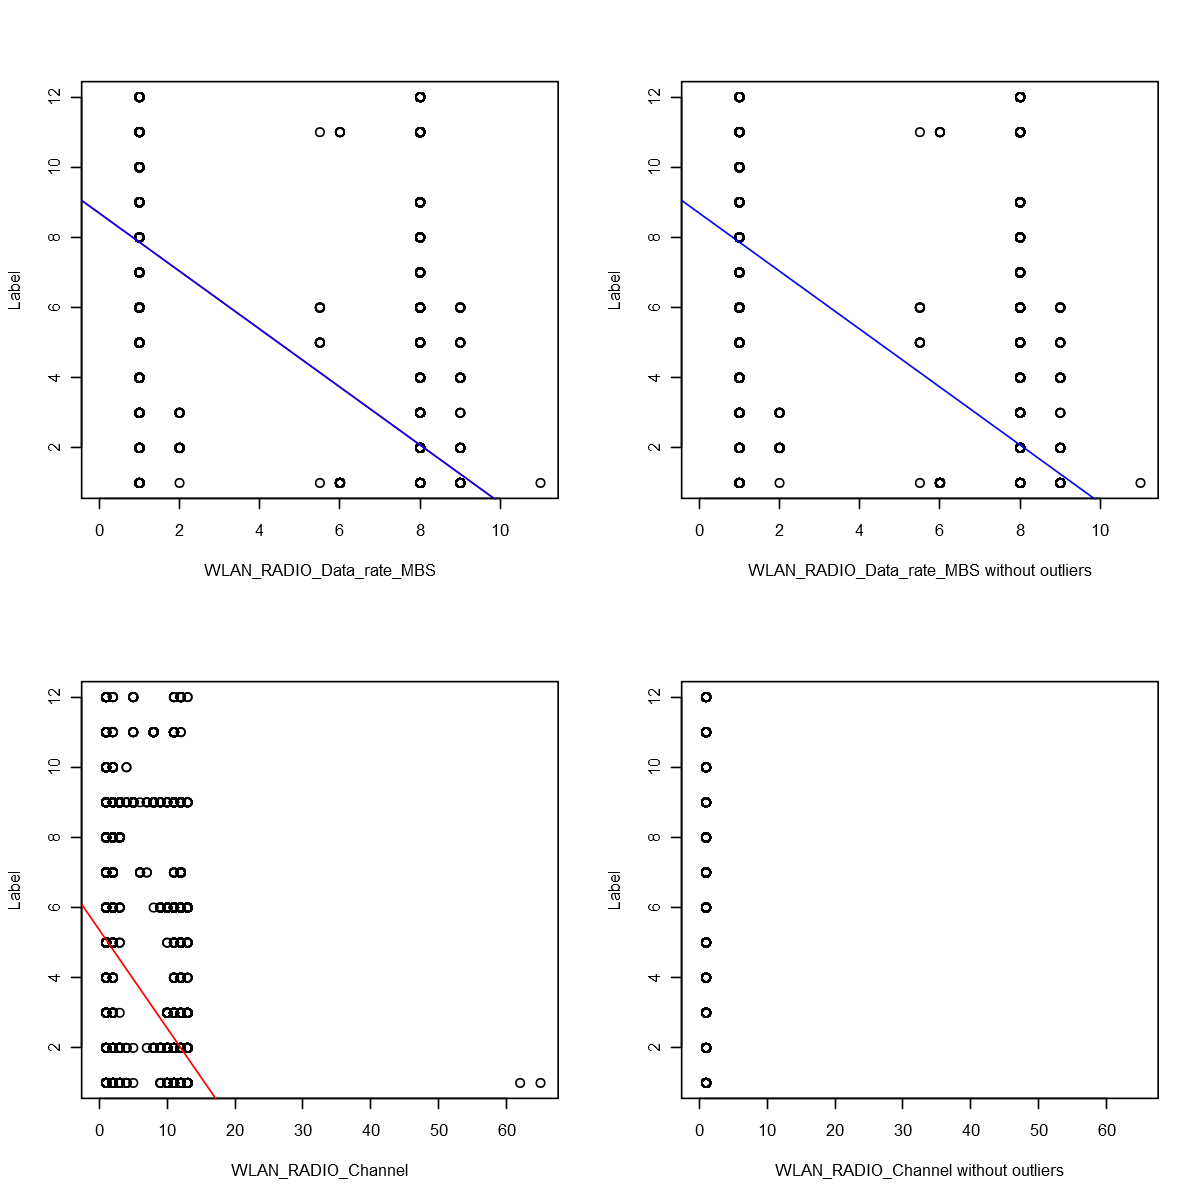

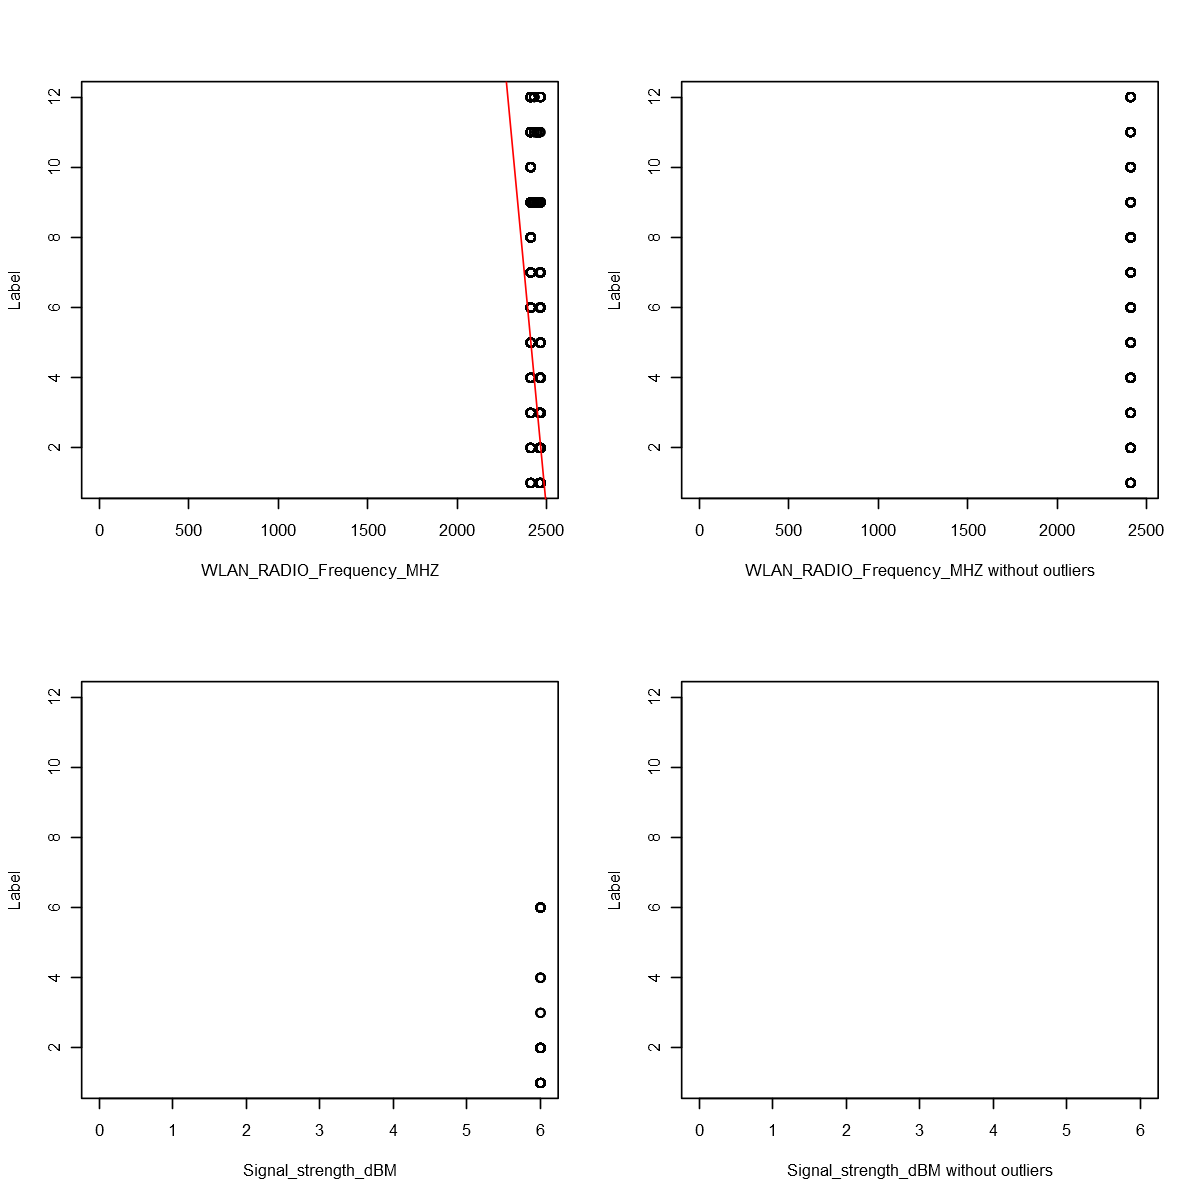

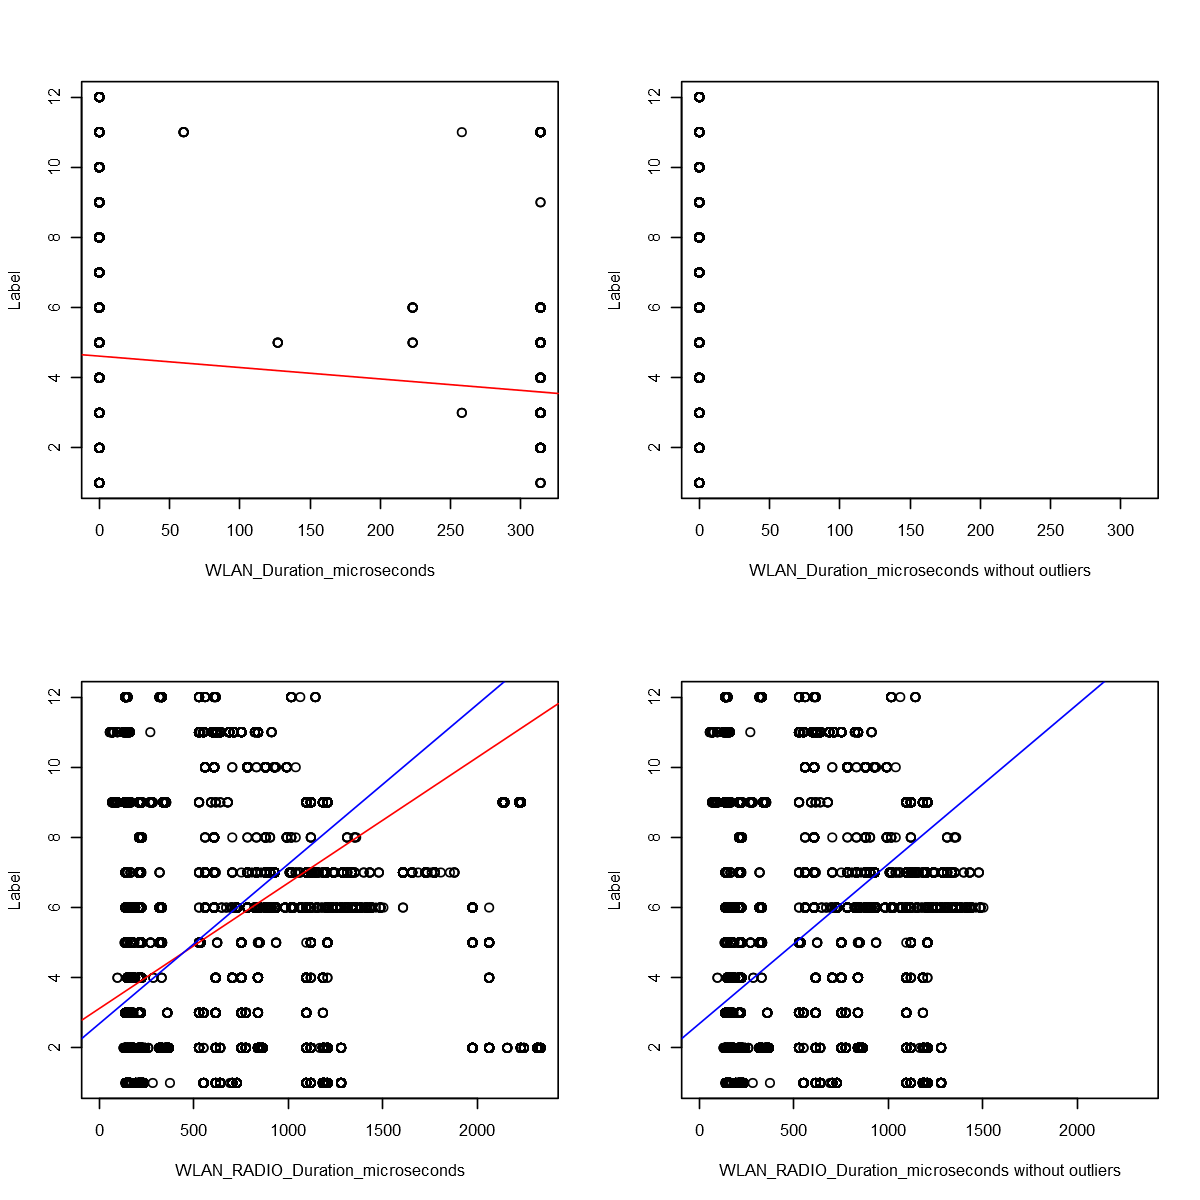

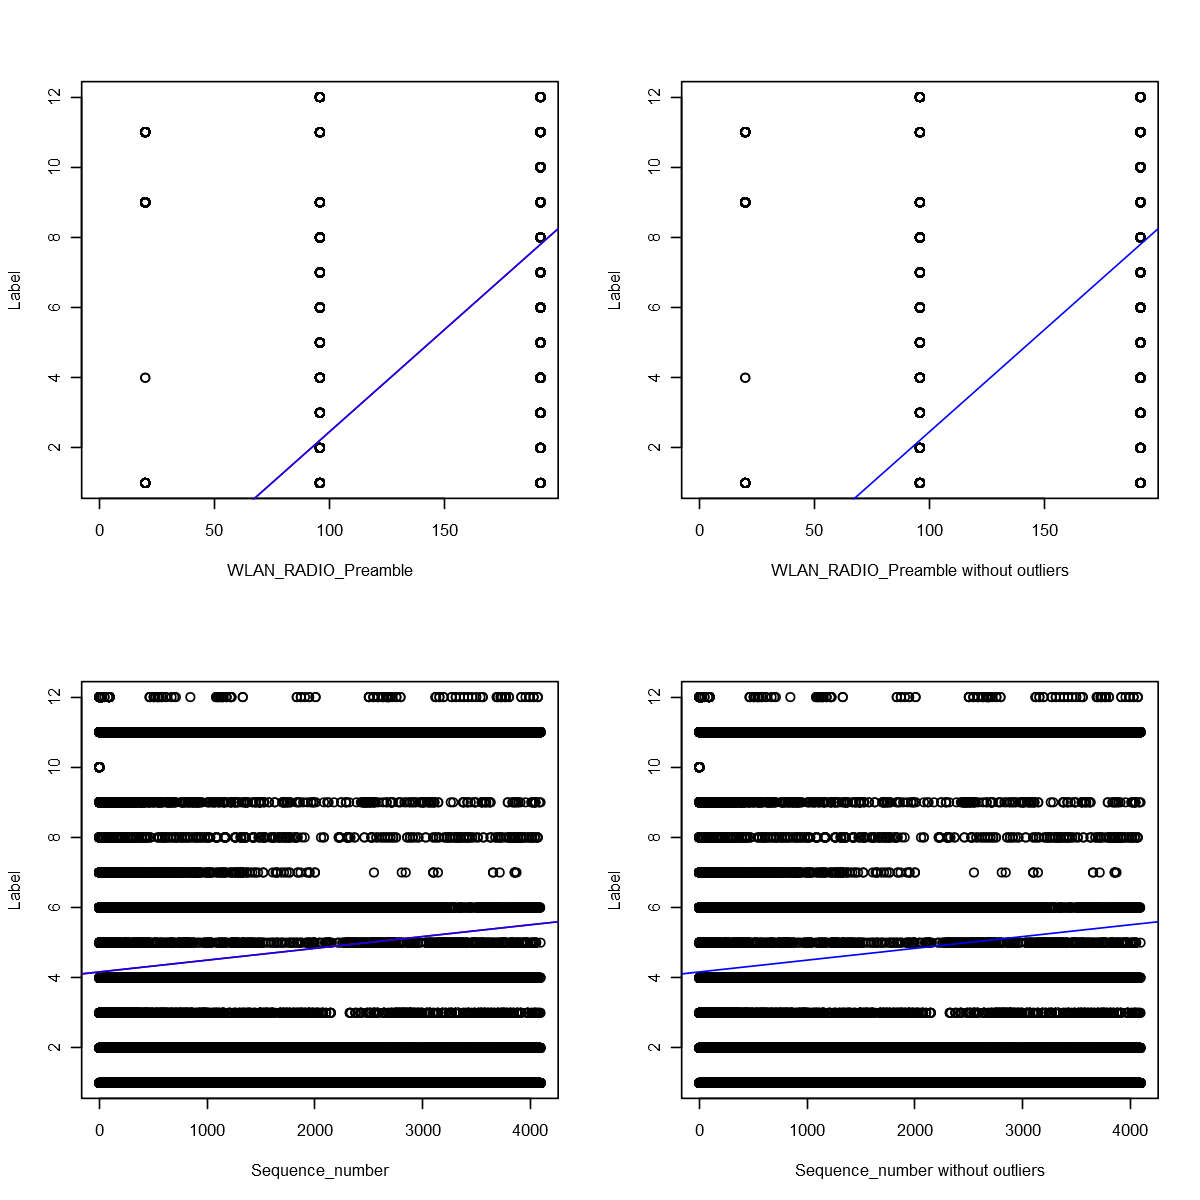

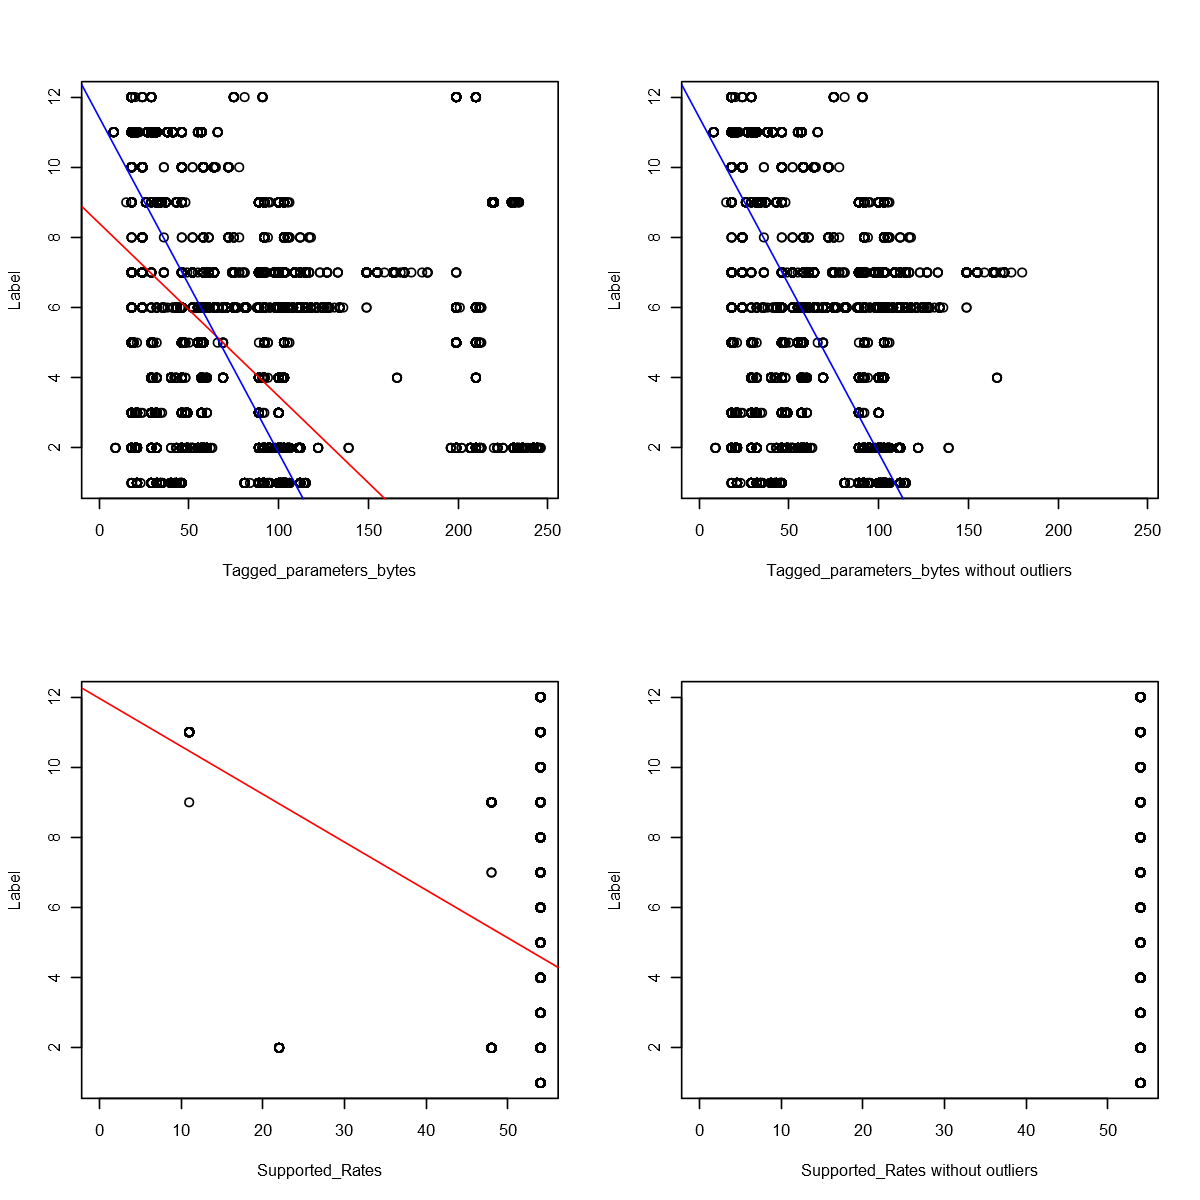

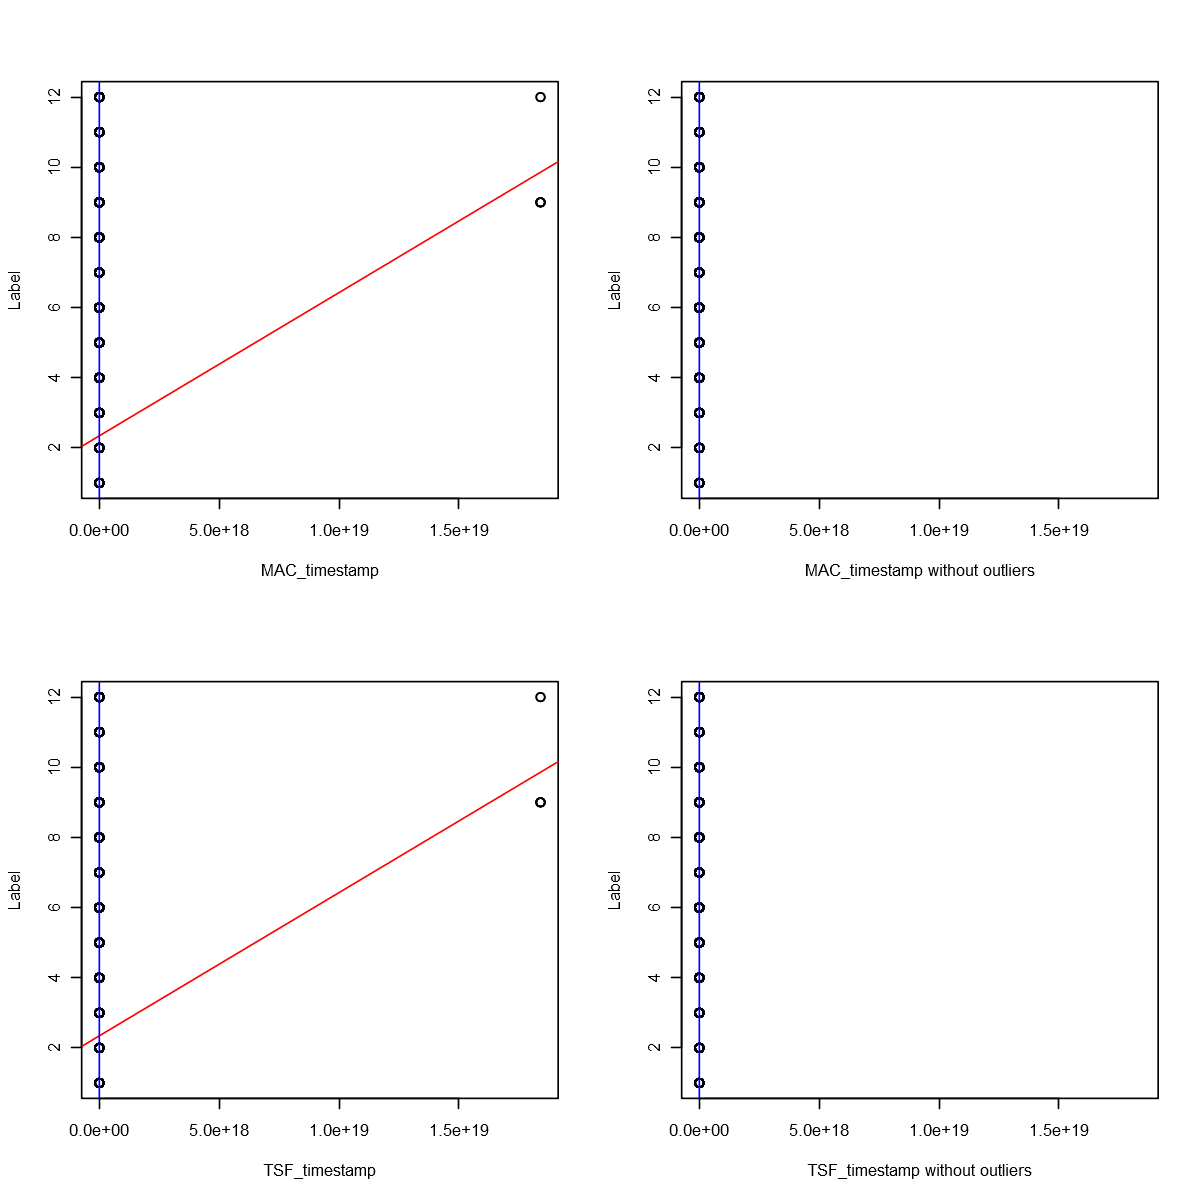

In [73]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (v in continuous){
            a<-max(df[[v]],na.rm=TRUE)
            b1<- df %>% select(Label,v)   
            b2<-df %>% select(Label,v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0) 
            plot(b1[[v]],b1$Label,xlab=v,ylab='Label',xlim=c(0,a))
            abline(coef(glm(b1$Label~b1[[v]])), col="red")
            if (length(unique(b2[[v]]))!=1){
            abline(coef(glm(b2$Label~b2[[v]])), col="blue")}
            plot(b2[[v]],b2$Label,xlab=paste(v,'without outliers',sep=' '),ylab='Label',xlim=c(0,a))
            if (length(unique(b2[[v]]))!=1){
            abline(coef(glm(b2$Label~b2[[v]])), col="blue")}}

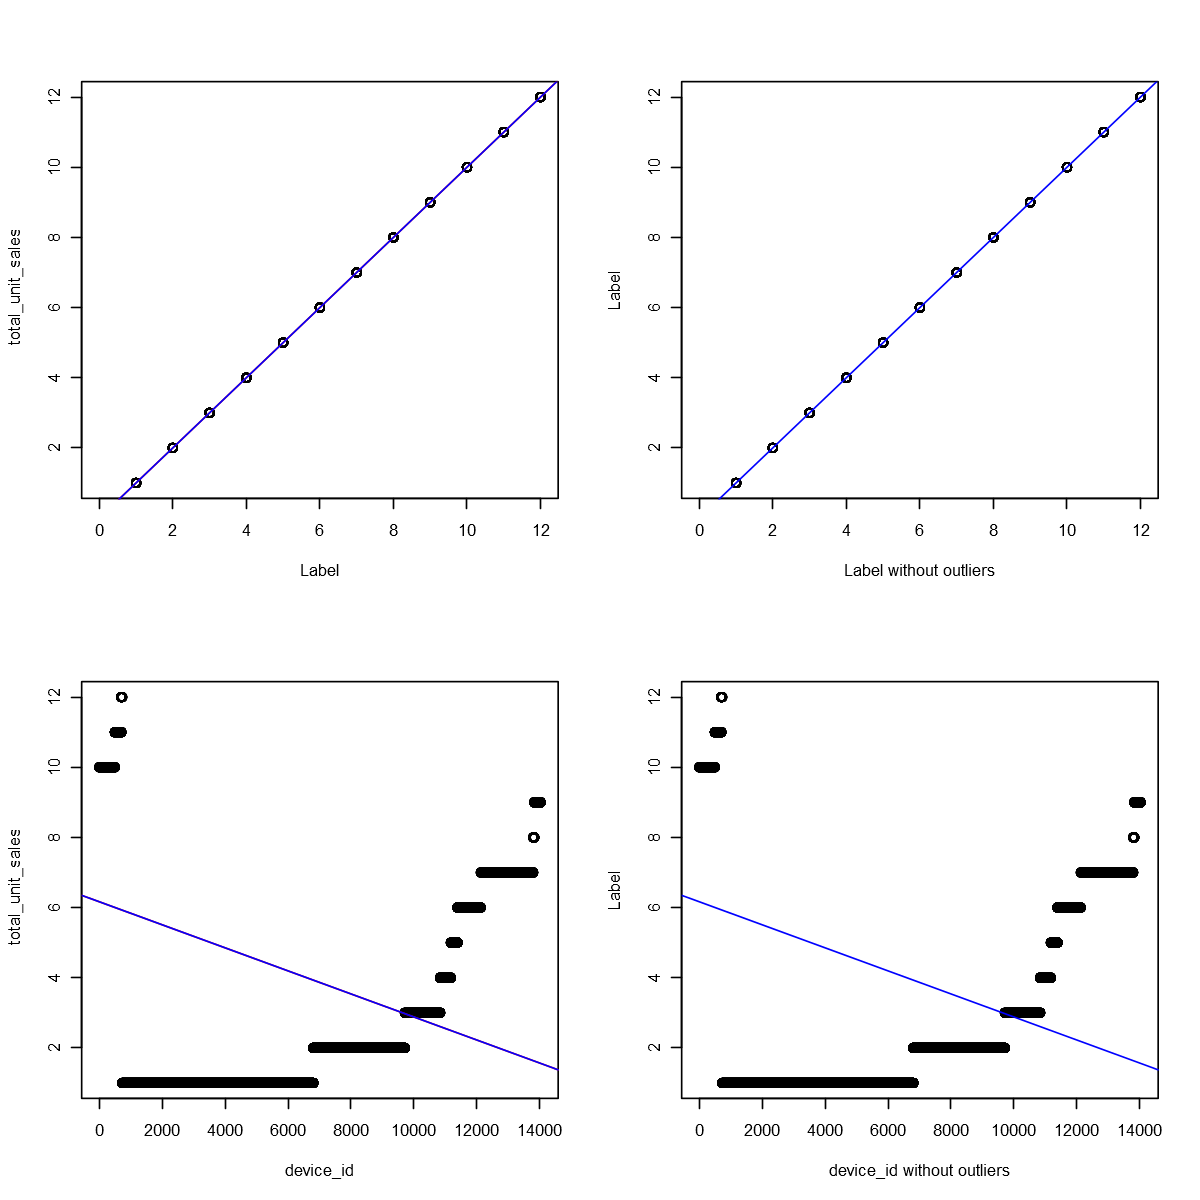

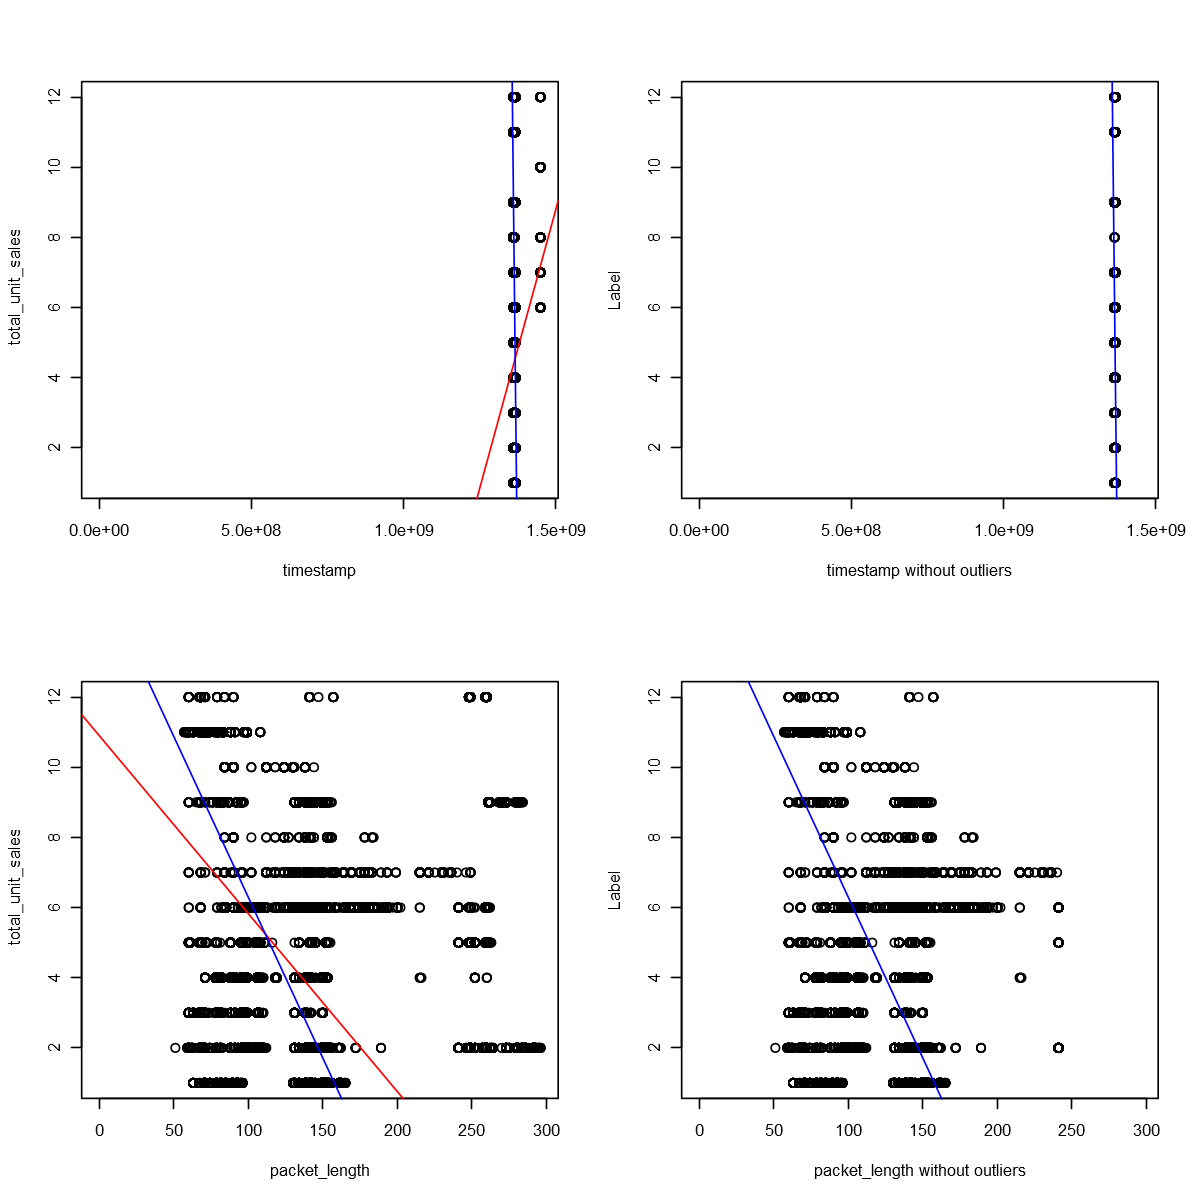

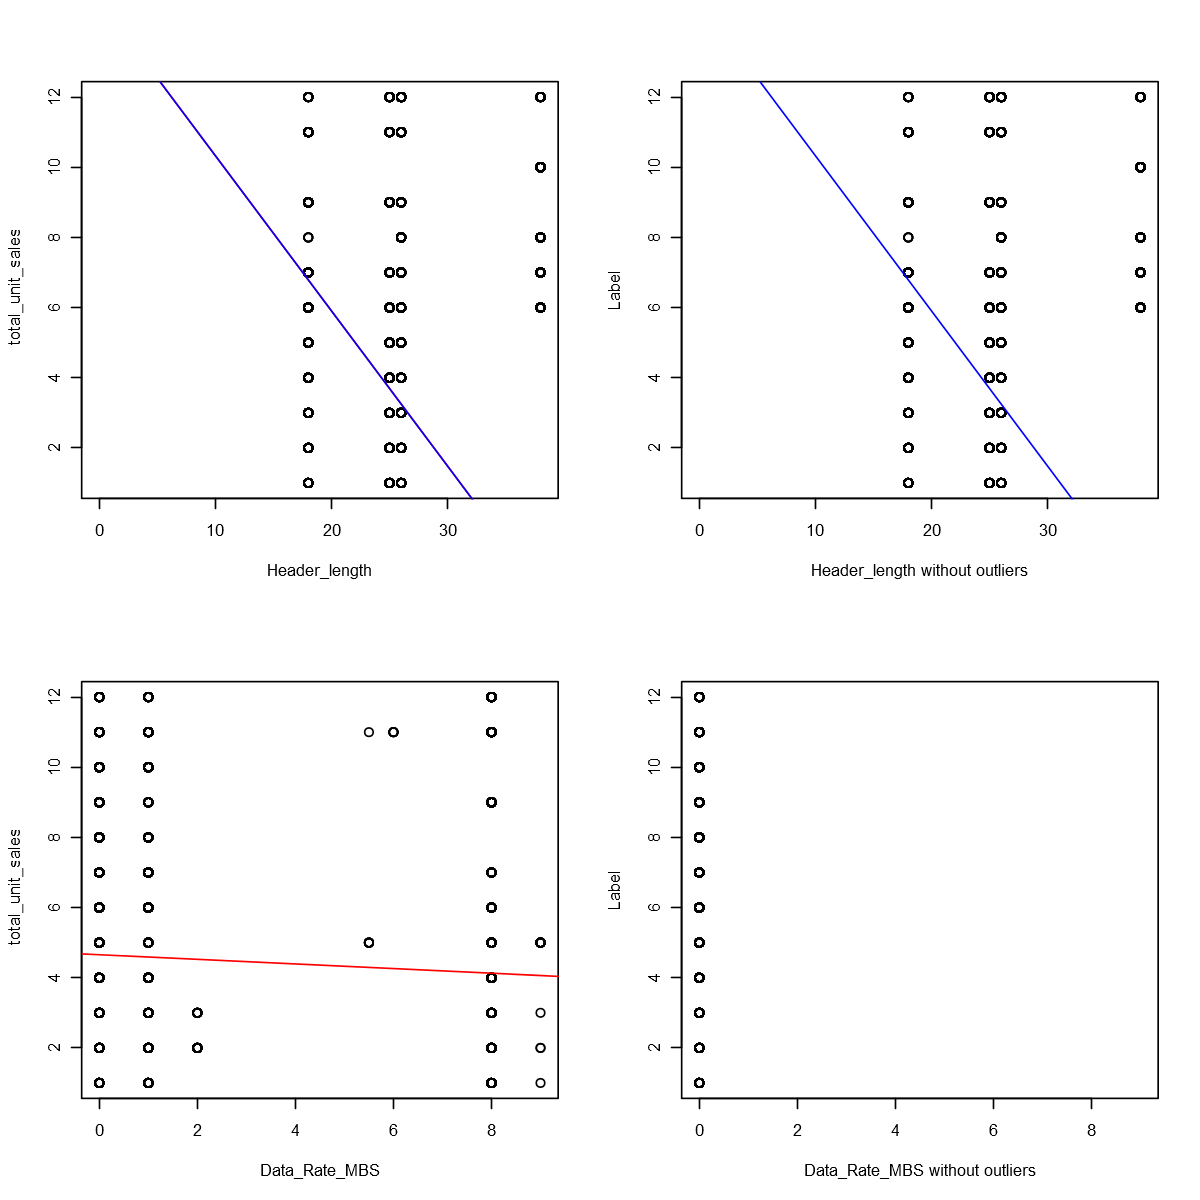

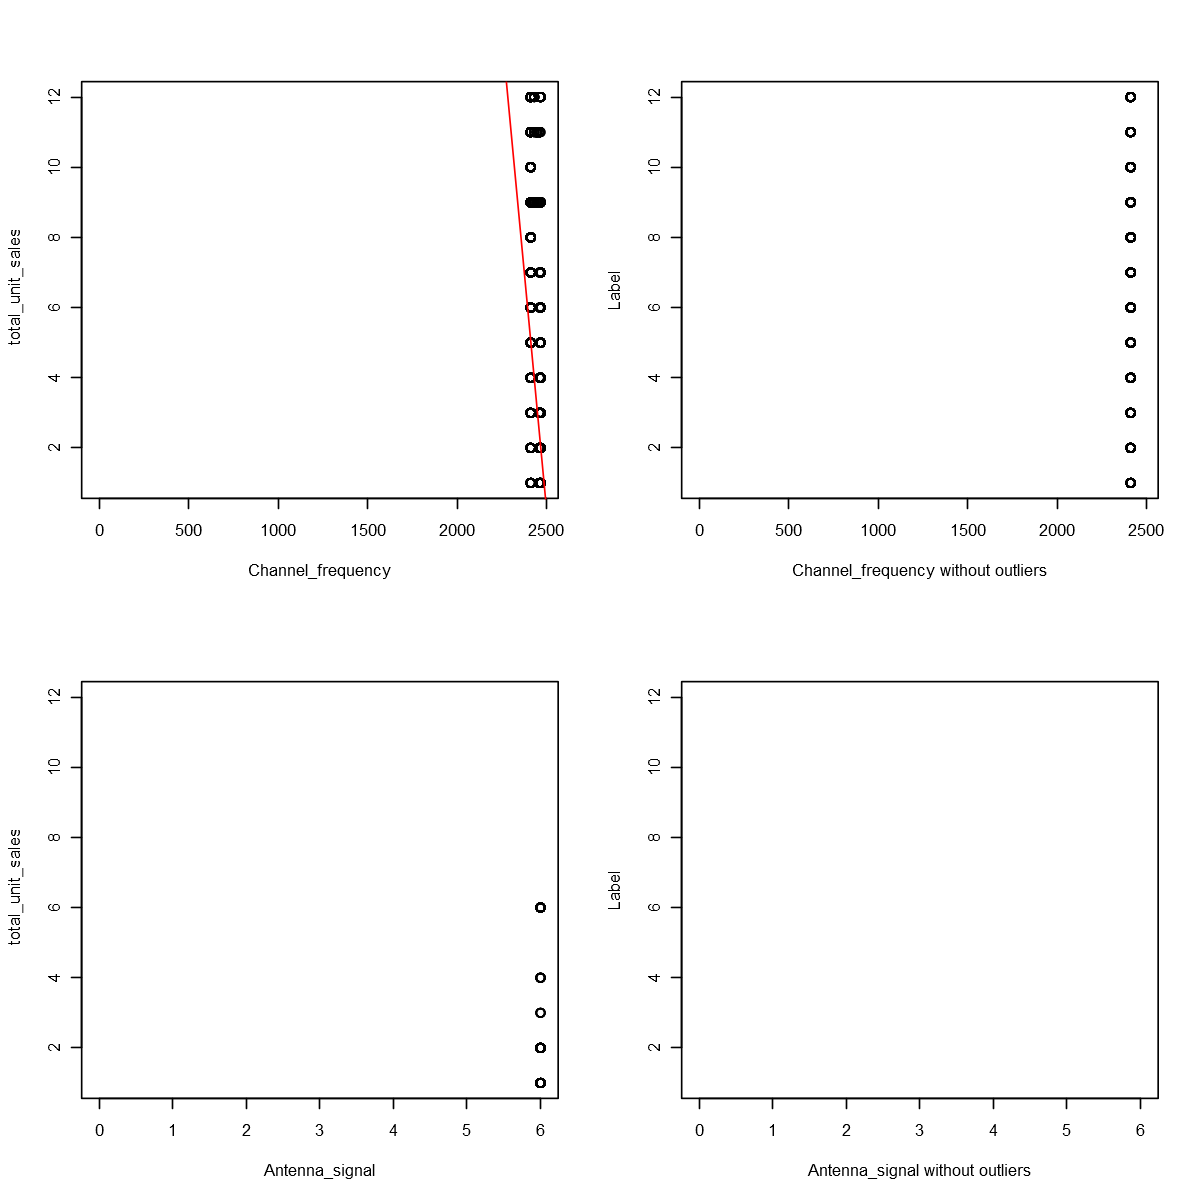

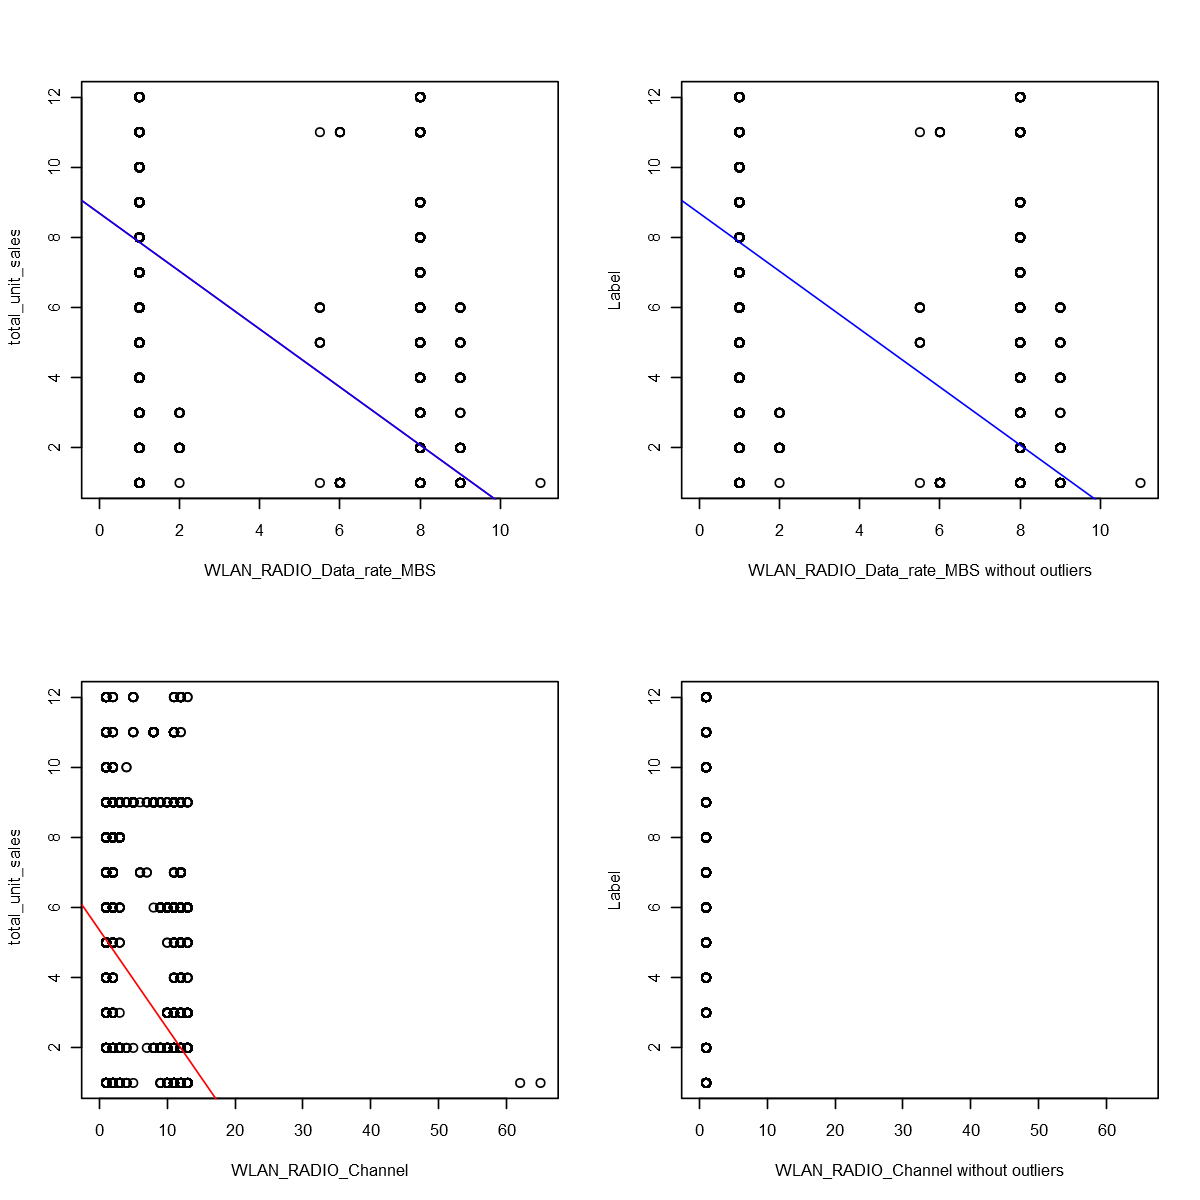

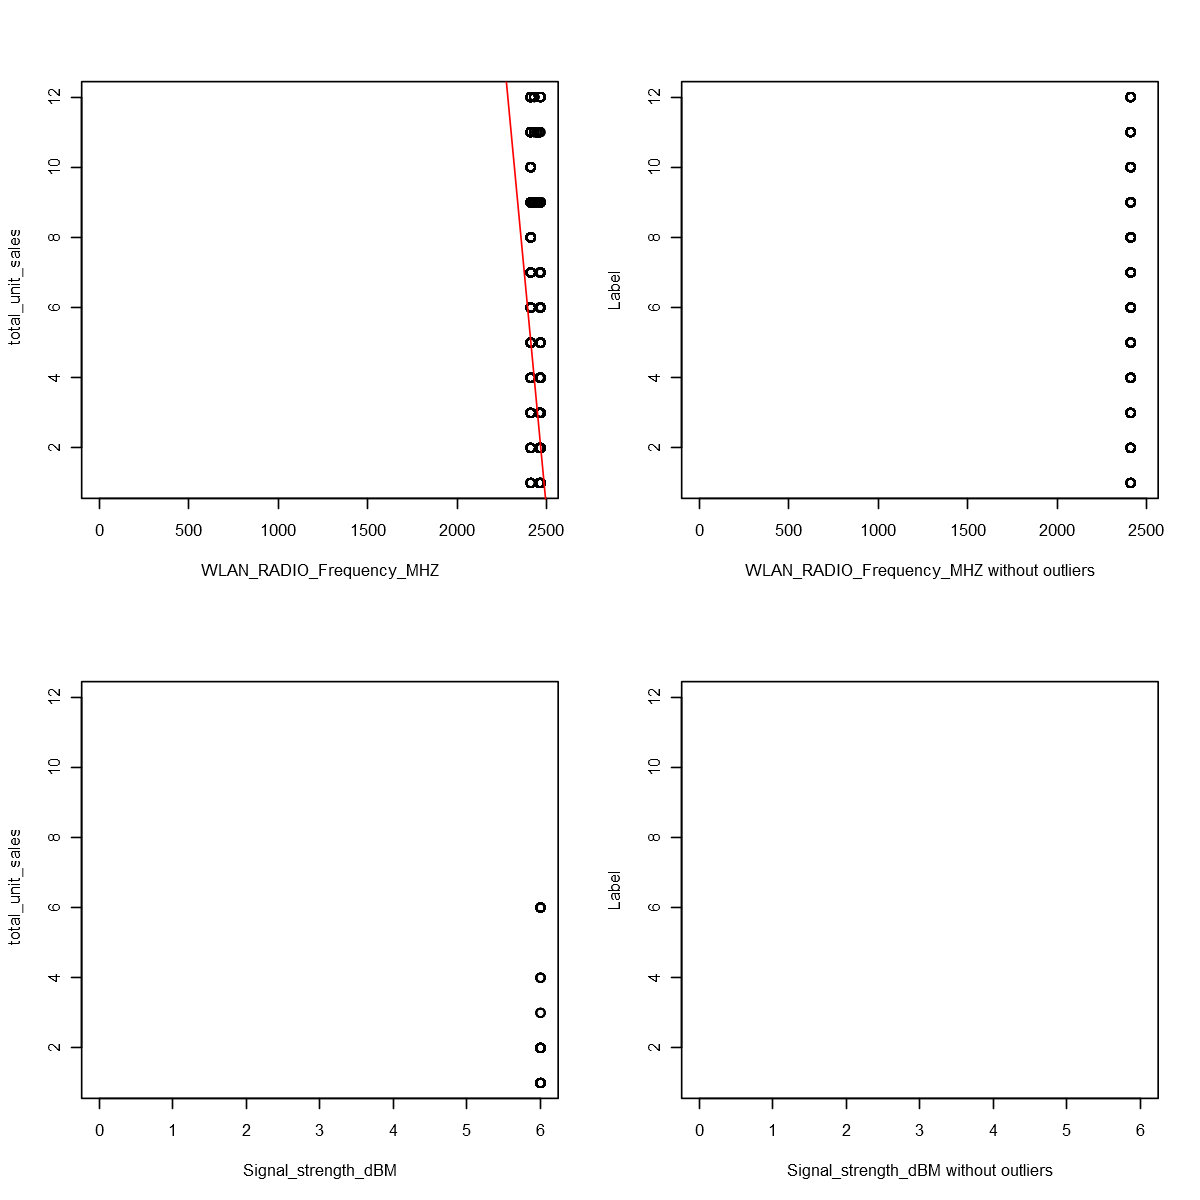

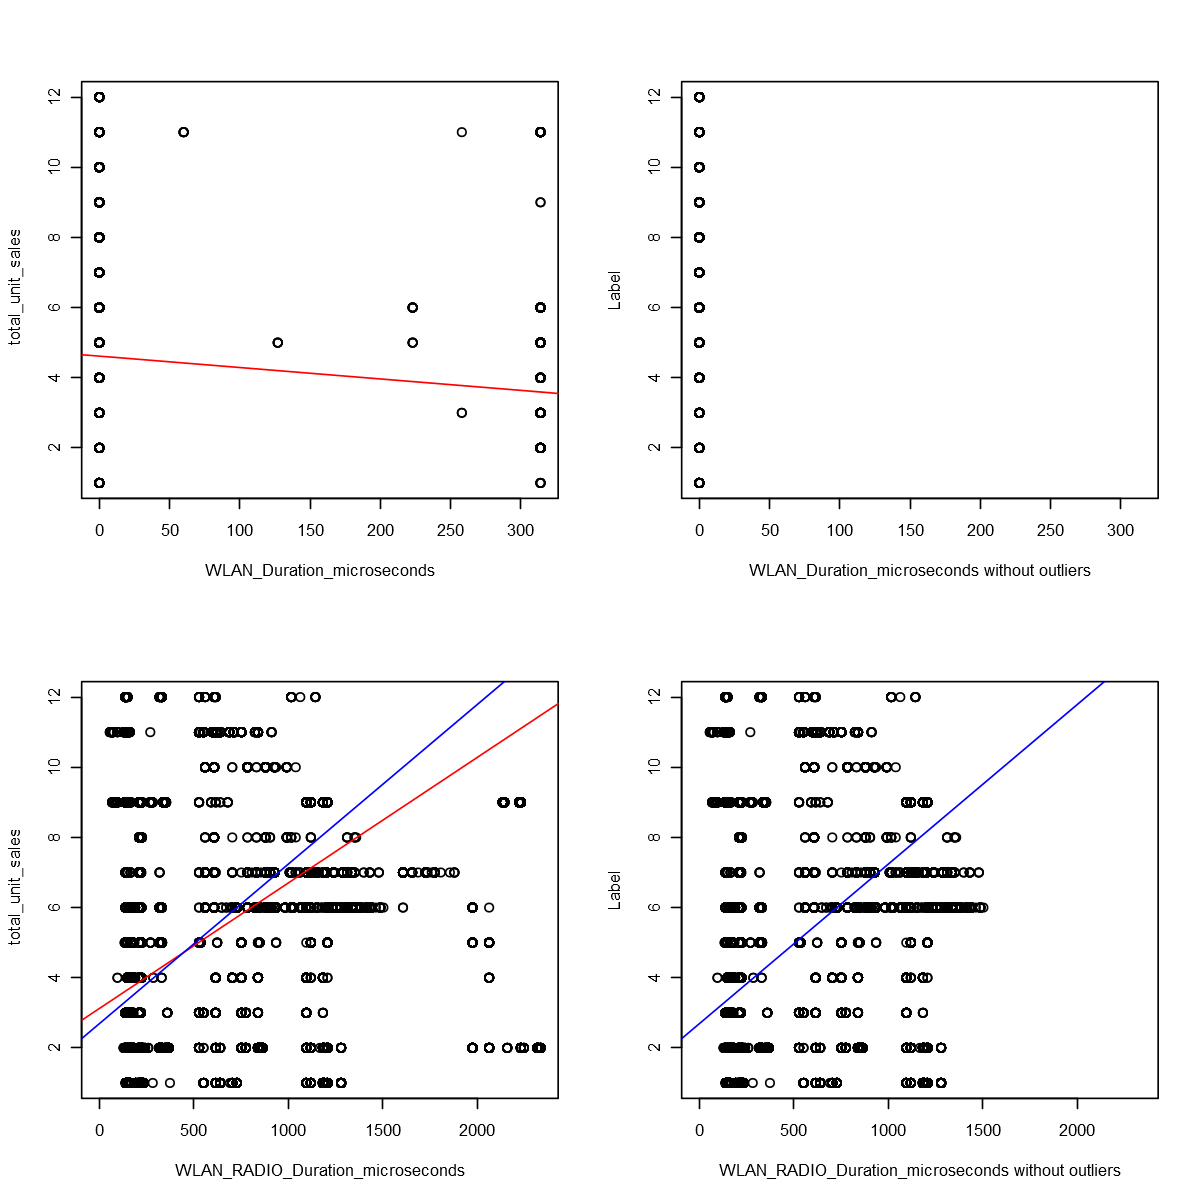

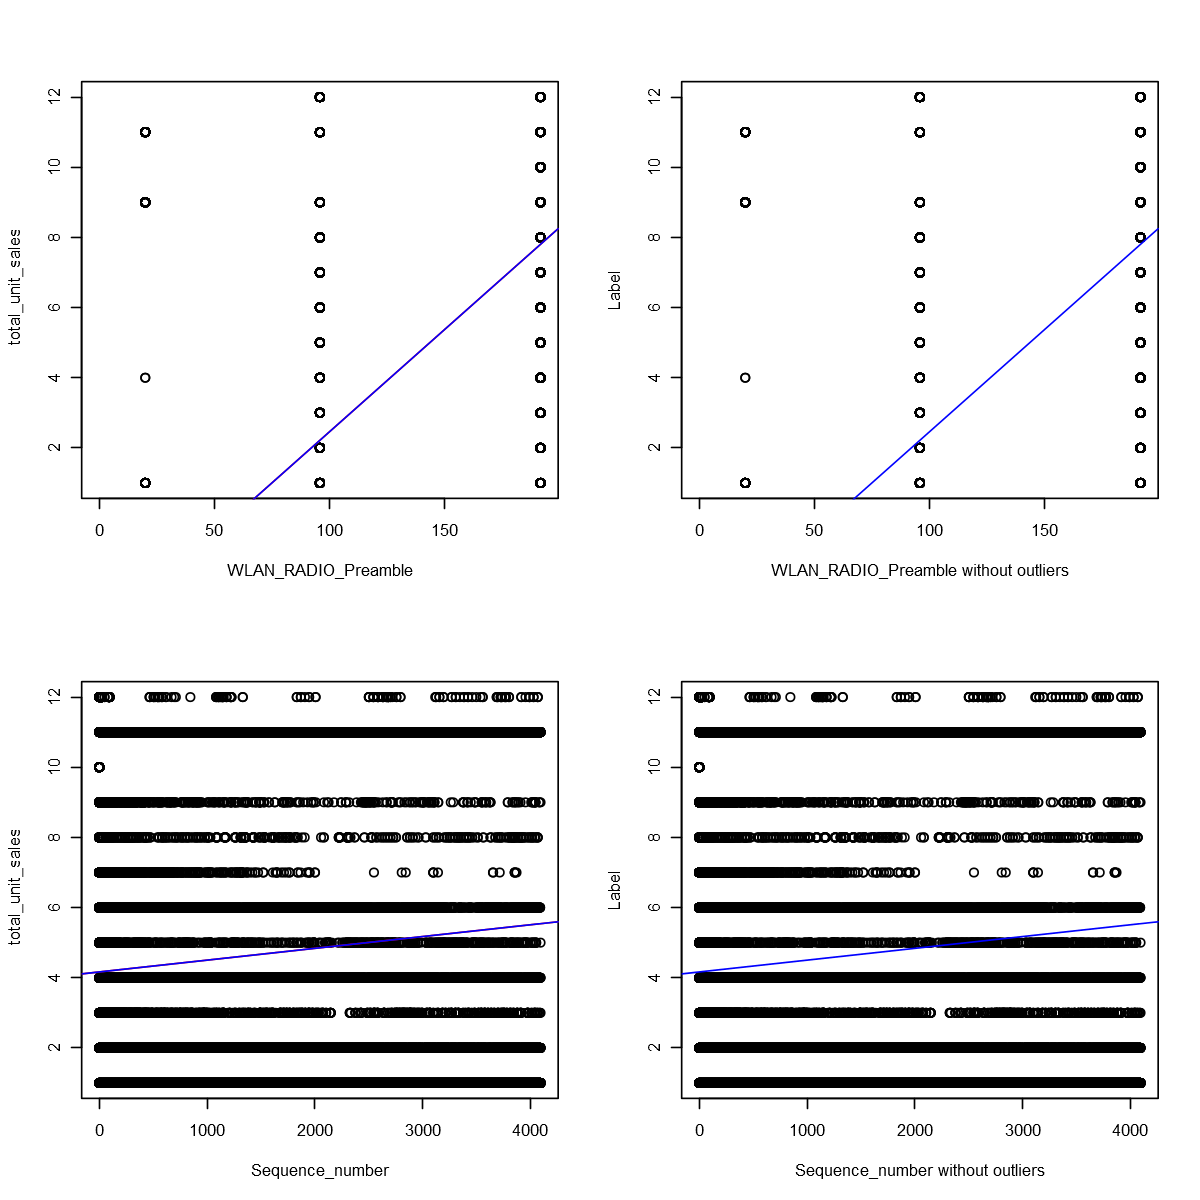

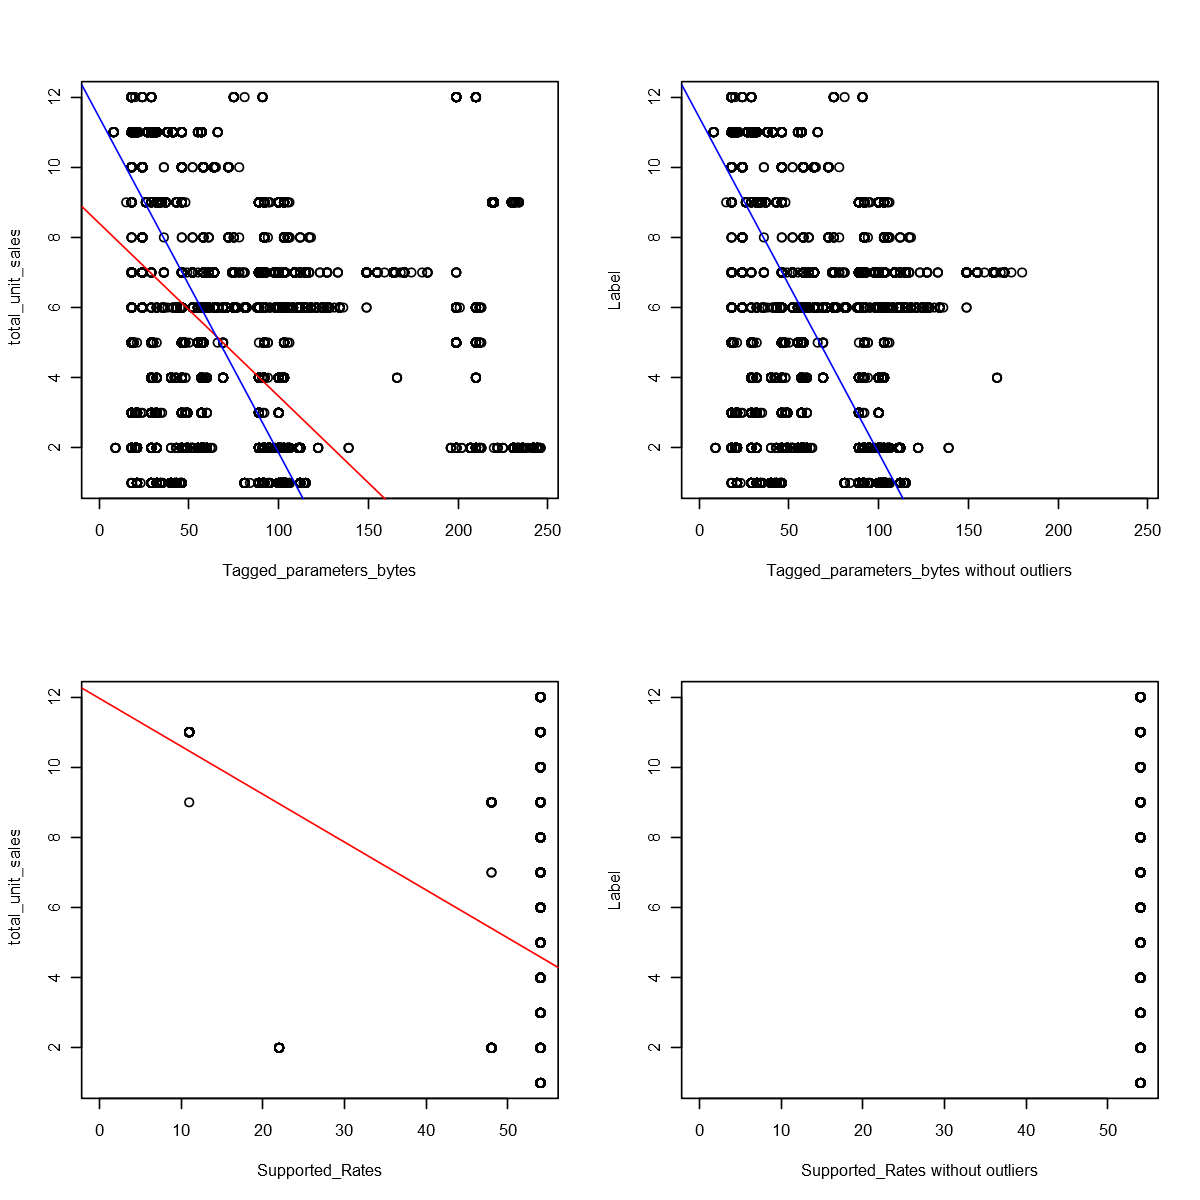

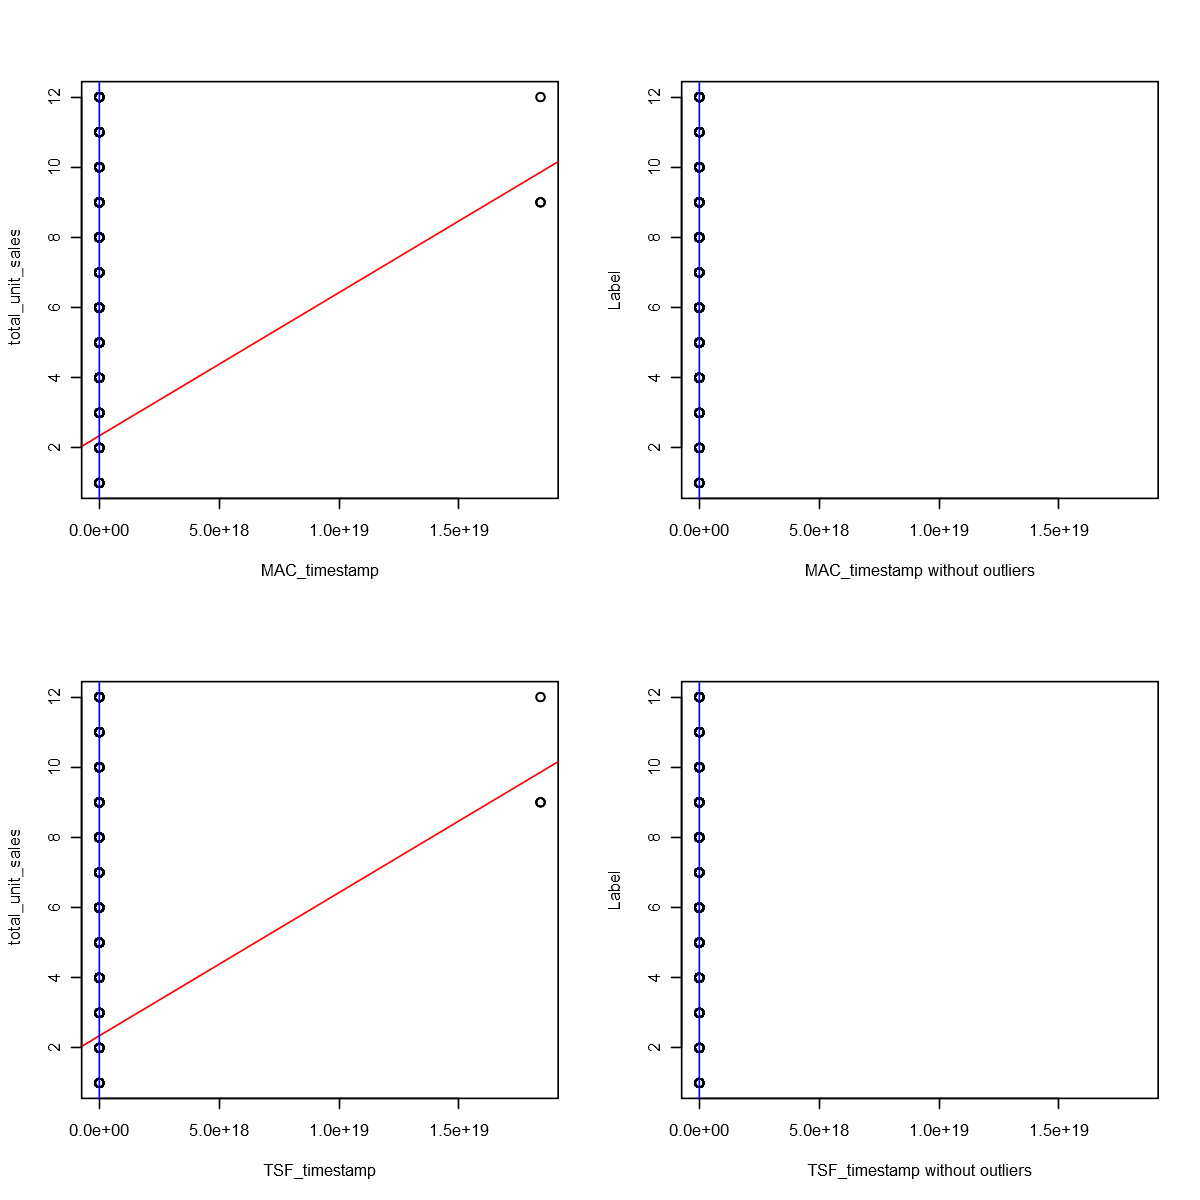

In [71]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (v in continuous){
            a<-max(df[[v]],na.rm=TRUE)
            b1<- df %>% select(Label,v)   
            b2<-df %>% select(Label,v) %>% filter(df.out[[paste(v,'out',sep='_')]]==0) 
            plot(b1[[v]],b1$Label,xlab=v,ylab='Label',xlim=c(0,a))
            abline(coef(lm(b1$Label~b1[[v]])), col="red")
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$Label~b2[[v]])), col="blue")}
            plot(b2[[v]],b2$Label,xlab=paste(v,'without outliers',sep=' '),ylab='Label',xlim=c(0,a))
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$Label~b2[[v]])), col="blue")}}

In [74]:
l1 <- continuous

In [62]:
#if(!require(dgof)) {install.packages("dgof");require(dgof)}

In [63]:
#x = df$NoOfInv
#y = df$AvgReturnAnnualisedByAct
#ks.test(x=x, y=y, alternative="two.sided",simulate.p.value=TRUE)

## Missing values

In [10]:
df.na<-df

In [11]:
missing <- getMissingness(df.na)
missing

list(var = c(12, 14, 15, 16, 17, 18, 19, 28, 46, 47), na_count = c(102330, 102330, 102330, 102330, 102330, 102330, 102330, 102330, 74301, 74301), rate = c(56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 56.2, 40.8, 40.8))This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows.



$missingness
                                var na_count rate
1                               CFP   102330 56.2
2                               WEP   102330 56.2
3                     Fragmentation   102330 56.2
4                        FCS_at_end   102330 56.2
5                           DataPad   102330 56.2
6                           Bad_FCS   102330 56.2
7                          Short_GI   102330 56.2
8                    Short_preamble   102330 56.2
9                     MAC_timestamp    74301 40.8
10                    TSF_timestamp    74301 40.8
11                         Bad_PLCP    27895 15.3
12 WLAN_RADIO_Duration_microseconds    27444 15.1
13              WLAN_RADIO_Preamble    27444 15.1
14                  Supported_Rates        1  0.0

$message
[1] "This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows."

$rows
NULL

In [12]:
misvar.l <- list(missing$missingness$var)
misvar.df <- data.frame(matrix(unlist(misvar.l), nrow=length(misvar.l), byrow=TRUE))
misvar.l <- as.list(as.data.frame(t(misvar.df)))
misvar.l

$V1
                              X1                               X2 
                             CFP                              WEP 
                              X3                               X4 
                   Fragmentation                       FCS_at_end 
                              X5                               X6 
                         DataPad                          Bad_FCS 
                              X7                               X8 
                        Short_GI                   Short_preamble 
                              X9                              X10 
                   MAC_timestamp                    TSF_timestamp 
                             X11                              X12 
                        Bad_PLCP WLAN_RADIO_Duration_microseconds 
                             X13                              X14 
             WLAN_RADIO_Preamble                  Supported_Rates 
14 Levels: Bad_FCS Bad_PLCP CFP DataPad FCS_at_end ... WLAN_RADIO_Preamble

In [13]:
misvar <- list('Bad_FCS','Bad_PLCP','CFP','DataPad','FCS_at_end','Fragmentation','MAC_timestamp','Short_GI','Short_preamble','Supported_Rates','TSF_timestamp','WEP','WLAN_RADIO_Duration_microseconds','WLAN_RADIO_Preamble')
misvar

[[1]]
[1] "Bad_FCS"

[[2]]
[1] "Bad_PLCP"

[[3]]
[1] "CFP"

[[4]]
[1] "DataPad"

[[5]]
[1] "FCS_at_end"

[[6]]
[1] "Fragmentation"

[[7]]
[1] "MAC_timestamp"

[[8]]
[1] "Short_GI"

[[9]]
[1] "Short_preamble"

[[10]]
[1] "Supported_Rates"

[[11]]
[1] "TSF_timestamp"

[[12]]
[1] "WEP"

[[13]]
[1] "WLAN_RADIO_Duration_microseconds"

[[14]]
[1] "WLAN_RADIO_Preamble"

In [14]:
for (i in misvar){
    print (i)
    print(table(df[[i]]))
}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [229]:
print('Bad_FCS')
table(df$Bad_FCS)
print('Bad_PLCP')
table(df$Bad_PLCP)
print('CFP')
table(df$CFP)
print('DataPad')
table(df$DataPad)
print('FCS_at_end')
table(df$FCS_at_end)
print('Fragmentation')
table(df$Fragmentation)
print('MAC_timestamp')
table(df$MAC_timestamp)
print('Short_GI')
table(df$Short_GI)
print('Short_preamble')
table(df$Short_preamble)
print('Supported_Rates')
table(df$Supported_Rates)
print('TSF_timestamp')
table(df$TSF_timestamp)
print('WEP')
table(df$WEP)
print('WLAN_RADIO_Duration_microseconds')
table(df$WLAN_RADIO_Duration_microseconds)
print('WLAN_RADIO_Preamble')
table(df$WLAN_RADIO_Preamble)


[1] "Bad_FCS"



    0 
79630 

[1] "Bad_PLCP"



     0 
154065 

[1] "CFP"



    0 
79630 

[1] "DataPad"



    0 
79630 

[1] "FCS_at_end"



    0     1 
74301  5329 

[1] "Fragmentation"



    0 
79630 

[1] "MAC_timestamp"



    527352     528587     529869     531072     532266     533477     534695 
         1          1          1          1          1          1          1 
    535994     537196     679907     697036     723100     724343     763528 
         1          1          1          1          1          1          1 
    764771     799542     821722     848389     860615     904279     924180 
         1          1          1          1          1          1          1 
    968298     975641    1023235    1124330    1159521    1160756    1162038 
         1          1          1          1          1          1          1 
   1164435    1336838    1371337    1372431    1409626    1465978    1733200 
         1          1          1          1          1          1          1 
   1838086    1842325    1858464    1897560    1900654    1921114    1941406 
         1          1          1          1          1          1          1 
   2048104    2177681    2221093    2231978    2250812    23175

[1] "Short_GI"



    0 
79630 

[1] "Short_preamble"



    0 
79630 

[1] "Supported_Rates"



    11     22     48     54 
   510     48    144 181257 

[1] "TSF_timestamp"



    527352     528587     529869     531072     532266     533477     534695 
         1          1          1          1          1          1          1 
    535994     537196     679907     697036     723100     724343     763528 
         1          1          1          1          1          1          1 
    764771     799542     821722     848389     860615     904279     924180 
         1          1          1          1          1          1          1 
    968298     975641    1023235    1124330    1159521    1160756    1162038 
         1          1          1          1          1          1          1 
   1164435    1336838    1371337    1372431    1409626    1465978    1733200 
         1          1          1          1          1          1          1 
   1838086    1842325    1858464    1897560    1900654    1921114    1941406 
         1          1          1          1          1          1          1 
   2048104    2177681    2221093    2231978    2250812    23175

[1] "WEP"



    0 
79630 

[1] "WLAN_RADIO_Duration_microseconds"



   56    68    76    80    84    92    96   128   129   134   135   136   138 
    4   157     2    52    15     1    24    12     4     2     1    35  1953 
  139   140   141   142   143   144   146   147   148   149   150   151   152 
  443    31   338     2     2     6     8     4   185  1011    11     5  2213 
  154   155   157   158   159   160   161   162   163   165   166   168   169 
   13     8    20     5     5  1450    12    11  3130    12  2511    30   855 
  171   172   175   177   178   179   180   181   186   189   192   201   208 
    2     6   106  1258   206     5   283     1     2    47    81    13     6 
  209   211   212   214   215   220   221   222   223   224   225   226   231 
11315    53  5620    42    44 17881 12220    68  6156    46    14    20    12 
  232   235   242   259   268   270   271   280   283   284   286   316   319 
 1202    12     6     3     8     1     8    38     1     1     2     4   317 
  321   322   324   327   328   330   332   333   3

[1] "WLAN_RADIO_Preamble"



   20    96   192 
  672 74306 79538 

In [15]:
df.nona <- read.csv("c:/Users/Mayer/Documents/DataScience/hackathon/Mostly no missing.csv")

In [16]:
getMissingness (df.nona)

list(var = c(46, 16, 47, 48, 34, 35, 45), na_count = c(181960, 102330, 74301, 74301, 27444, 27444, 1), rate = c(100, 56.2, 40.8, 40.8, 15.1, 15.1, 0))This dataset has 0 (0%) complete rows. Original data has 181960 rows.



$missingness
                               var na_count  rate
1                  Current_Channel   181960 100.0
2                       FCS_at_end   102330  56.2
3                    MAC_timestamp    74301  40.8
4                    TSF_timestamp    74301  40.8
5 WLAN_RADIO_Duration_microseconds    27444  15.1
6              WLAN_RADIO_Preamble    27444  15.1
7                  Supported_Rates        1   0.0

$message
[1] "This dataset has 0 (0%) complete rows. Original data has 181960 rows."

$rows
NULL

In [17]:
df.nona <- subset(df.nona,select = -c(Current_Channel))

In [18]:
getMissingness (df.nona)

list(var = c(16, 46, 47, 34, 35, 45), na_count = c(102330, 74301, 74301, 27444, 27444, 1), rate = c(56.2, 40.8, 40.8, 15.1, 15.1, 0))This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows.



$missingness
                               var na_count rate
1                       FCS_at_end   102330 56.2
2                    MAC_timestamp    74301 40.8
3                    TSF_timestamp    74301 40.8
4 WLAN_RADIO_Duration_microseconds    27444 15.1
5              WLAN_RADIO_Preamble    27444 15.1
6                  Supported_Rates        1  0.0

$message
[1] "This dataset has 5329 (2.9%) complete rows. Original data has 181960 rows."

$rows
NULL

#### Categorizing df-without cleaning outlairs

In [19]:
table(df.nona$FCS_at_end)


    0     1 
74301  5329 

In [35]:
df.nona$FCS_at_end <- ifelse(is.na(df.nona$FCS_at_end),'miss',as.character(df.nona$FCS_at_end))
df.nona$FCS_at_end <- as.factor(df.nona$FCS_at_end)


In [36]:
table(df.nona$FCS_at_end)


     0      1   miss 
 74301   5329 102330 

In [22]:
df.nona$MAC_timestamp <- ifelse(is.na(df.nona$MAC_timestamp),0,df.nona$MAC_timestamp)
df.nona$TSF_timestamp <- ifelse(is.na(df.nona$TSF_timestamp),0,df.nona$TSF_timestamp)


In [23]:
table(df.nona %>% select (c('ï..Label','WLAN_RADIO_Duration_microseconds')) %>% filter (df.nona$ï..Label==1))

        WLAN_RADIO_Duration_microseconds
ï..Label   138   141   143   148   149   152   154   155   160   161   162
       1     2   182     1   119    75  2065    13     8  1083     1     8
        WLAN_RADIO_Duration_microseconds
ï..Label   163   165   166   192   201   208   209   211   212   215   220
       1  3112    11    12    81    13     6  9373    43   754     1 14982
        WLAN_RADIO_Duration_microseconds
ï..Label   221   222   223   224   225   226   232   235   283   374   552
       1 12212    56  1909    46     2     7  1200    12     1     1    61
        WLAN_RADIO_Duration_microseconds
ï..Label   616   640   692   704   728  1096  1120  1184  1192  1208  1280
       1    21   716     1    27  1358  3470   257  4470  3852   664   308

In [24]:
table(df.nona %>% select (c('ï..Label','WLAN_RADIO_Duration_microseconds')) %>% filter (df.nona$ï..Label==2))

        WLAN_RADIO_Duration_microseconds
ï..Label  129  138  140  149  152  160  163  166  168  169  171  172  175  177
       2    4  235    7  147    6    2   10  778    1  751    2    6   49  234
        WLAN_RADIO_Duration_microseconds
ï..Label  178  179  180  209  211  212  214  215  220  221  222  223  225  226
       2   42    3  278 1006    6 4337   39   41 1157    8    2 2806    7    9
        WLAN_RADIO_Duration_microseconds
ï..Label  231  232  242  259  316  319  322  324  327  330  332  333  340  345
       2   12    2    6    3    4  194    2    1   32 1113    5    3    1    3
        WLAN_RADIO_Duration_microseconds
ï..Label  351  353  356  358  359  362  365  366  368  528  552  616  640  752
       2   43    2   58    1    1  648    6    3   36  162    2   28   12  290
        WLAN_RADIO_Duration_microseconds
ï..Label  776  840  848  864 1096 1120 1168 1184 1192 1208 1280 1976 2064 2160
       2  395  160  126   94  486 1919    1  201   13  639   35  111  546    8
     

In [25]:
table(df.nona %>% select (c('ï..Label','WLAN_RADIO_Duration_microseconds')) %>% filter (df.nona$ï..Label==3))

        WLAN_RADIO_Duration_microseconds
ï..Label 138 140 141 143 144 149 151 152 166 168 169 177 180 209 211 220 360
       3 930   4 149   1   1 242   3  72 702   2 104 206   2 250   1  37  12
        WLAN_RADIO_Duration_microseconds
ï..Label 528 552 616 752 776 840 1096 1184
       3 544  51 204 339  45  32   84    5

In [26]:
table(df.nona %>% select (c('ï..Label','WLAN_RADIO_Duration_microseconds')) %>% filter (df.nona$ï..Label==4))

        WLAN_RADIO_Duration_microseconds
ï..Label   96  149  150  152  159  160  162  163  166  168  177  179  180  189
       4    2  125    2   13    5  365    3    1  548   24  777    2    3   15
        WLAN_RADIO_Duration_microseconds
ï..Label  209  211  212  214  220  222  223  286  330  616  704  752  840 1096
       4  265    2   67    1 1511   10   35    2    3   47   93   89  472  127
        WLAN_RADIO_Duration_microseconds
ï..Label 1120 1184 1208 2064
       4    6   41    2   13

In [39]:

df.nona$WLAN_RADIO_Duration_microseconds <- ifelse(is.na(df.nona$WLAN_RADIO_Duration_microseconds),'miss',as.character(df.nona$WLAN_RADIO_Duration_microseconds))
df.nona$WLAN_RADIO_Duration_microseconds <- as.factor(df.nona$WLAN_RADIO_Duration_microseconds)


In [28]:
table(df.nona$WLAN_RADIO_Duration_microseconds)


 1008  1016  1024  1032  1040  1056  1064  1072  1096  1120  1128  1136  1144 
    5   180   144     1     5     2    20    10  4549  2632     3     1    15 
 1152  1160  1168  1176  1184  1192  1200  1208  1232  1240  1248  1256   128 
   88     5     1     2  5121  3866   149  2392   164   121     1    11    12 
 1280  1288   129  1304  1312  1336   134   135  1352   136  1360   138  1384 
  376   106     4    20    60   131     2     1     7    35    26  1953    13 
  139   140  1400  1408   141  1416   142   143  1432   144  1440   146  1464 
  443    31     2     6   338     9     2     2     9     6    29     8     1 
  147   148  1480  1488   149   150  1504   151   152   154   155   157   158 
    4   185     3    10  1011    11     1     5  2213    13     8    20     5 
  159   160  1608   161   162   163   165  1656   166   168  1688   169   171 
    5  1450   107    12    11  3130    12    20  2511    30     1   855     2 
  172  1728  1736   175  1760   177  1776   178   1

In [29]:
table(df.nona$WLAN_RADIO_Preamble)


   20    96   192 
  672 74306 79538 

In [40]:
df.nona$WLAN_RADIO_Preamble<- ifelse(is.na(df.nona$WLAN_RADIO_Preamble),'miss',
ifelse (df.nona$WLAN_RADIO_Preamble == 20,'20',
ifelse(df.nona$WLAN_RADIO_Preamble == 96, '96',as.character(df.nona$WLAN_RADIO_Preamble))))

df.nona$WLAN_RADIO_Preamble <- as.factor(df.nona$WLAN_RADIO_Preamble)

In [31]:
table(df.nona$Supported_Rates)


    11     22     48     54 
   510     48    144 181257 

In [32]:
df.nona$Supported_Rates <- ifelse(is.na(df.nona$Supported_Rates),54,df.nona$FCS_at_end)


In [44]:
table(df.nona$Preamble)


         Long 
102330  79630 

In [45]:
df.nona$Preamble <- as.factor(df.nona$Preamble)

In [41]:
getMissingness(df.nona)

list(var = integer(0), na_count = numeric(0), rate = numeric(0))This dataset has 181960 (100%) complete rows. Original data has 181960 rows.



$missingness
[1] var      na_count rate    
<0 rows> (or 0-length row.names)

$message
[1] "This dataset has 181960 (100%) complete rows. Original data has 181960 rows."

$rows
NULL

In [46]:
summary(df.nona)

    ï..Label        device_id       timestamp         packet_length
 Min.   : 1.000   Min.   :    1   Min.   :1.360e+09   Min.   : 51  
 1st Qu.: 1.000   1st Qu.:  663   1st Qu.:1.366e+09   1st Qu.: 88  
 Median : 2.000   Median : 3712   Median :1.367e+09   Median :139  
 Mean   : 4.606   Mean   : 4747   Mean   :1.368e+09   Mean   :124  
 3rd Qu.:11.000   3rd Qu.: 7842   3rd Qu.:1.367e+09   3rd Qu.:150  
 Max.   :12.000   Max.   :14029   Max.   :1.450e+09   Max.   :296  
                                                                   
 Header_length        TSFT            Flags             Rate       
 Min.   :18.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :25.00   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :22.93   Mean   :0.5624   Mean   :0.4083   Mean   :0.9707  
 3rd Qu.:26.00   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :38.00   Max.   :1.0000   Max.   :1.0000

In [50]:
df.nona$SSID <- as.factor(df.nona$SSID)


In [51]:
df.nona$Destination_address <- as.factor(df.nona$Destination_address)
df.nona$BSS_Id <- as.factor(df.nona$BSS_Id)

In [47]:
write.csv(df.nona,"c:/Users/Mayer/Documents/DataScience/hackathon/train.csv/nona.train.csv",row.names = FALSE )
